<a href="https://colab.research.google.com/github/kaitlynrv/regression-repo/blob/main/Prosperity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/WorldBank2002_2.csv')

In [ ]:
df.head()

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Net barter terms of trade (2000,Official development assistance,"Personal computers (per 1,000 p",Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
0,Angola,46,8,1,78,7,15,1672000000,10834800000,14,...,89,421369984,2,3,14618782,27,1208400000,1246700,6.41346,11.726
1,Benin,30,34,0,14,6,37,18000000,2807360000,5,...,88,216290000,2,3,7666962,53,73600000,112620,5.79909,68.078
2,Botswana,46,3,2,46,3,326,403000000,5423320000,5,...,97,37560000,40,0,1771008,46,16000000,581730,7.90101,3.044
3,Burkina Faso,39,31,0,8,7,15,15026000,3203350000,4,...,91,472729984,2,3,12022321,51,12900000,274000,5.52146,43.877
4,Burundi,91,41,0,6,7,11,1000,628096000,4,...,76,172120000,1,3,6818131,41,96300000,27830,4.60517,244.992


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Series                           47 non-null     object 
 1   Agricultural land (% of land ar  47 non-null     int64  
 2   Agriculture, value added (% of   47 non-null     object 
 3   CO2 emissions (metric tons per   47 non-null     object 
 4   Exports of goods and services (  47 non-null     object 
 5   Fertility rate, total (births p  47 non-null     object 
 6   Fixed line and mobile phone sub  47 non-null     object 
 7   Foreign direct investment, net   47 non-null     object 
 8   GDP (current US$)                47 non-null     object 
 9   GDP growth (annual %)            47 non-null     object 
 10  GNI per capita, Atlas method (c  47 non-null     object 
 11  GNI, Atlas method (current US$)  47 non-null     object 
 12  Gross capital formation 

In [ ]:
df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Military expenditure (% of GDP)',
       'Net barter terms of trade (2000', 'Official development assistance',
       'Personal computers (per 1,000 p', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added 

## Prepare Data for Analysis

In [ ]:
num_col = ['Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Military expenditure (% of GDP)',
       'Net barter terms of trade (2000', 'Official development assistance',
       'Personal computers (per 1,000 p', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area']


for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert the specified columns to float
df[num_col] = df[num_col].astype(float)

In [ ]:
df.isnull().sum()

Series                              0
Agricultural land (% of land ar     0
Agriculture, value added (% of      1
CO2 emissions (metric tons per      2
Exports of goods and services (     3
Fertility rate, total (births p     2
Fixed line and mobile phone sub     1
Foreign direct investment, net      1
GDP (current US$)                   1
GDP growth (annual %)               1
GNI per capita, Atlas method (c     2
GNI, Atlas method (current US$)     2
Gross capital formation (% of G     3
Immunization, measles (% of chi     0
Imports of goods and services (     4
Industry, value added (% of GDP     1
Inflation, GDP deflator (annual     1
Internet users (per 1,000 peopl     1
Life expectancy at birth, total     0
Long-term debt (DOD, current US     1
Merchandise trade (% of GDP)        1
Military expenditure (% of GDP)    13
Net barter terms of trade (2000     2
Official development assistance     0
Personal computers (per 1,000 p     7
Population growth (annual %)        0
Population, 

47 entries
Drop Military expenditure since more than 20% null
Drop Personal Computers bc close to 20% and data set so small

In [ ]:
df = df.drop('Military expenditure (% of GDP)', axis=1)

In [ ]:
df.isnull().sum()

Series                             0
Agricultural land (% of land ar    0
Agriculture, value added (% of     1
CO2 emissions (metric tons per     2
Exports of goods and services (    3
Fertility rate, total (births p    2
Fixed line and mobile phone sub    1
Foreign direct investment, net     1
GDP (current US$)                  1
GDP growth (annual %)              1
GNI per capita, Atlas method (c    2
GNI, Atlas method (current US$)    2
Gross capital formation (% of G    3
Immunization, measles (% of chi    0
Imports of goods and services (    4
Industry, value added (% of GDP    1
Inflation, GDP deflator (annual    1
Internet users (per 1,000 peopl    1
Life expectancy at birth, total    0
Long-term debt (DOD, current US    1
Merchandise trade (% of GDP)       1
Net barter terms of trade (2000    2
Official development assistance    0
Personal computers (per 1,000 p    7
Population growth (annual %)       0
Population, total                  0
Services, etc., value added (%     1
S

In [ ]:
#check nulls per row
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      2
9      0
10     1
11     0
12     0
13     6
14     0
15     0
16     0
17     0
18     0
19     0
20     1
21     0
22     2
23     4
24     1
25     0
26     0
27     3
28     0
29     0
30     3
31     0
32     0
33     1
34     1
35     0
36     0
37     1
38    15
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
dtype: int64

In [ ]:
#drop row 38
df = df.drop(38)
df.isnull().sum()

Series                             0
Agricultural land (% of land ar    0
Agriculture, value added (% of     0
CO2 emissions (metric tons per     1
Exports of goods and services (    2
Fertility rate, total (births p    2
Fixed line and mobile phone sub    1
Foreign direct investment, net     1
GDP (current US$)                  0
GDP growth (annual %)              0
GNI per capita, Atlas method (c    1
GNI, Atlas method (current US$)    1
Gross capital formation (% of G    2
Immunization, measles (% of chi    0
Imports of goods and services (    3
Industry, value added (% of GDP    0
Inflation, GDP deflator (annual    0
Internet users (per 1,000 peopl    1
Life expectancy at birth, total    0
Long-term debt (DOD, current US    1
Merchandise trade (% of GDP)       0
Net barter terms of trade (2000    1
Official development assistance    0
Personal computers (per 1,000 p    7
Population growth (annual %)       0
Population, total                  0
Services, etc., value added (%     0
S

In [ ]:
#drop Personal Computer
df = df.drop('Personal computers (per 1,000 p', axis = 1)

In [ ]:
df.isnull().sum()

Series                             0
Agricultural land (% of land ar    0
Agriculture, value added (% of     0
CO2 emissions (metric tons per     1
Exports of goods and services (    2
Fertility rate, total (births p    2
Fixed line and mobile phone sub    1
Foreign direct investment, net     1
GDP (current US$)                  0
GDP growth (annual %)              0
GNI per capita, Atlas method (c    1
GNI, Atlas method (current US$)    1
Gross capital formation (% of G    2
Immunization, measles (% of chi    0
Imports of goods and services (    3
Industry, value added (% of GDP    0
Inflation, GDP deflator (annual    0
Internet users (per 1,000 peopl    1
Life expectancy at birth, total    0
Long-term debt (DOD, current US    1
Merchandise trade (% of GDP)       0
Net barter terms of trade (2000    1
Official development assistance    0
Population growth (annual %)       0
Population, total                  0
Services, etc., value added (%     0
Short-term debt outstanding (DO    1
S

In [ ]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

<ipython-input-184-c6455a908190>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Series                             0
Agricultural land (% of land ar    0
Agriculture, value added (% of     0
CO2 emissions (metric tons per     0
Exports of goods and services (    0
Fertility rate, total (births p    0
Fixed line and mobile phone sub    0
Foreign direct investment, net     0
GDP (current US$)                  0
GDP growth (annual %)              0
GNI per capita, Atlas method (c    0
GNI, Atlas method (current US$)    0
Gross capital formation (% of G    0
Immunization, measles (% of chi    0
Imports of goods and services (    0
Industry, value added (% of GDP    0
Inflation, GDP deflator (annual    0
Internet users (per 1,000 peopl    0
Life expectancy at birth, total    0
Long-term debt (DOD, current US    0
Merchandise trade (% of GDP)       0
Net barter terms of trade (2000    0
Official development assistance    0
Population growth (annual %)       0
Population, total                  0
Services, etc., value added (%     0
Short-term debt outstanding (DO    0
S

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 46
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Series                           46 non-null     object 
 1   Agricultural land (% of land ar  46 non-null     float64
 2   Agriculture, value added (% of   46 non-null     float64
 3   CO2 emissions (metric tons per   46 non-null     float64
 4   Exports of goods and services (  46 non-null     float64
 5   Fertility rate, total (births p  46 non-null     float64
 6   Fixed line and mobile phone sub  46 non-null     float64
 7   Foreign direct investment, net   46 non-null     float64
 8   GDP (current US$)                46 non-null     float64
 9   GDP growth (annual %)            46 non-null     float64
 10  GNI per capita, Atlas method (c  46 non-null     float64
 11  GNI, Atlas method (current US$)  46 non-null     float64
 12  Gross capital formation 

In [ ]:
df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

In [ ]:
df.describe()

,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (c",...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,4.600000e+01,4.600000e+01,46.000000,46.000000,...,46.000000,46.000000,4.600000e+01,46.000000,4.600000e+01,46.00000,4.600000e+01,4.600000e+01,46.000000,46.000000
mean,48.043478,28.173913,0.644444,31.863636,5.295455,88.355556,2.114272e+08,7.737991e+09,3.717391,772.888889,...,61.826087,94.288889,3.763965e+08,2.282609,1.493665e+07,45.00000,6.038378e+08,5.136326e+05,5.999886,76.457435
std,21.375954,16.718990,1.565681,21.520627,1.407591,153.622503,3.953434e+08,1.761304e+10,5.935442,1232.535999,...,37.770244,19.974008,4.326050e+08,0.910752,2.197939e+07,14.61354,1.335958e+09,5.928307e+05,1.002745,105.478554
min,8.000000,3.000000,0.000000,6.000000,2.000000,3.000000,1.000000e+03,5.355240e+07,-13.000000,90.000000,...,10.000000,30.000000,7.850000e+06,0.000000,8.370000e+04,5.00000,4.000000e+06,4.600000e+02,4.499810,2.378000
25%,31.000000,14.000000,0.000000,16.000000,4.000000,13.000000,9.750000e+06,1.063545e+09,1.250000,212.500000,...,33.250000,89.250000,5.998500e+07,2.000000,1.839802e+06,38.25000,3.267500e+07,4.128750e+04,5.358740,15.254250
50%,47.000000,29.500000,0.000000,27.000000,5.295455,28.500000,5.650000e+07,3.162625e+09,4.000000,325.000000,...,55.000000,93.000000,2.740300e+08,2.000000,8.710361e+06,45.00000,1.511500e+08,2.708350e+05,5.783705,39.212500
75%,62.750000,40.000000,0.911111,41.750000,6.000000,84.750000,2.355000e+08,5.772950e+09,5.000000,617.500000,...,77.750000,97.000000,4.613175e+08,3.000000,1.672156e+07,54.75000,6.332845e+08,8.186150e+05,6.396505,96.815750
max,91.000000,76.000000,8.000000,95.000000,8.000000,788.000000,1.874000e+09,1.110000e+11,27.000000,6840.000000,...,169.000000,186.000000,2.202720e+09,4.000000,1.231343e+08,77.00000,7.400000e+09,2.505810e+06,8.830540,593.137000


<ipython-input-188-f1ed64f20b5a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr()


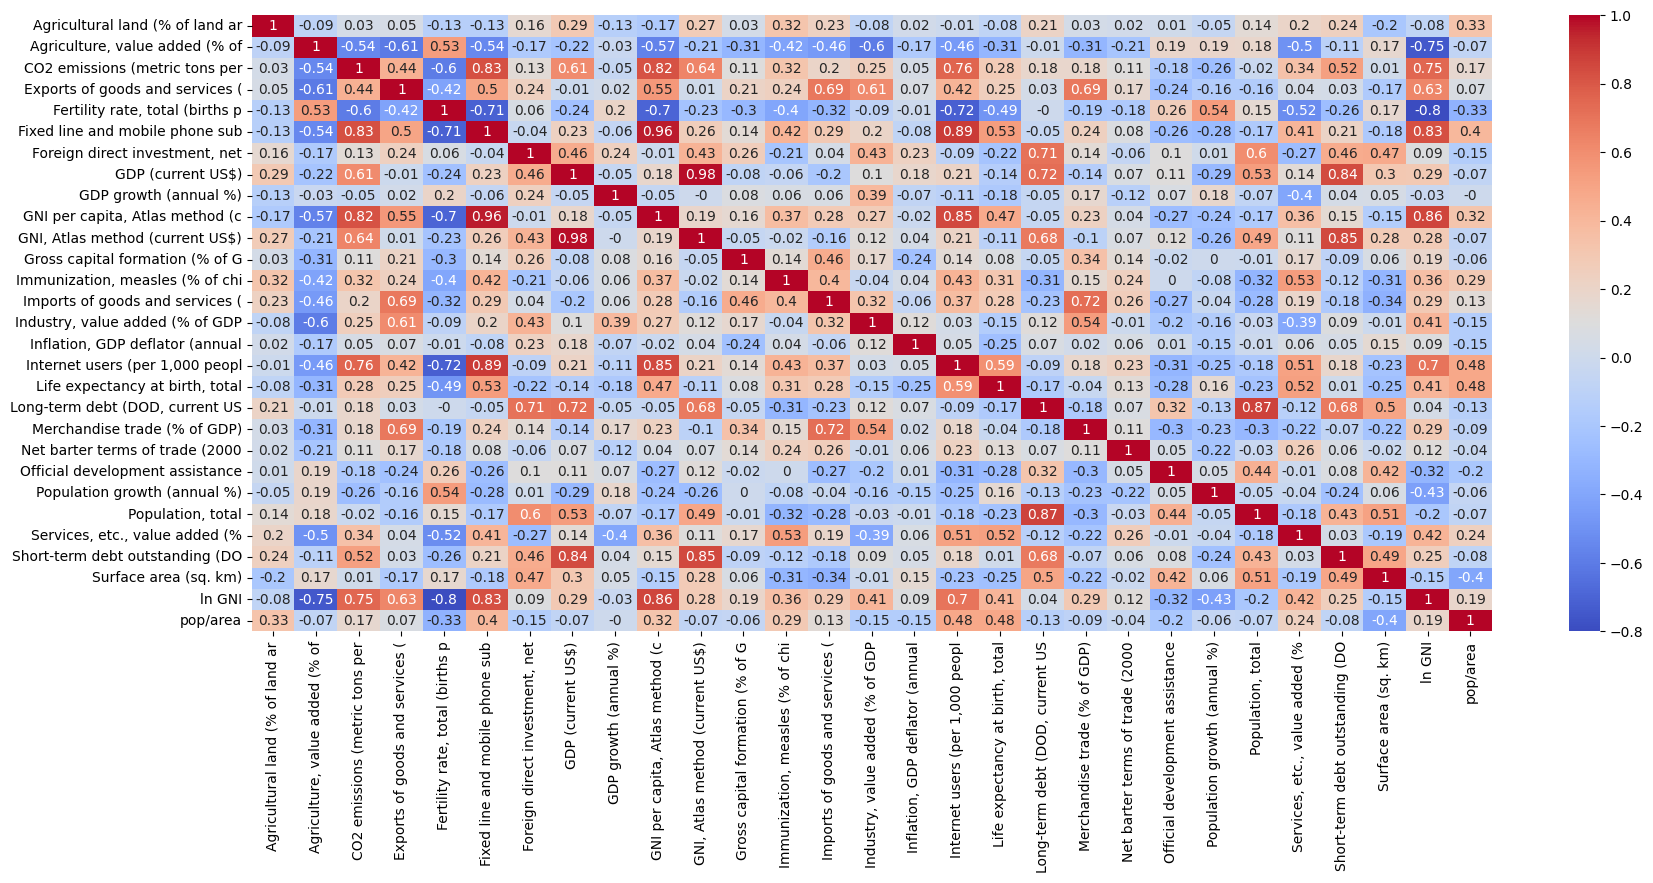

In [ ]:
# Compute correlations
cormat = df.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (20,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

In [ ]:
num_col = ['Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)',
       'Net barter terms of trade (2000', 'Official development assistance',
       'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area']

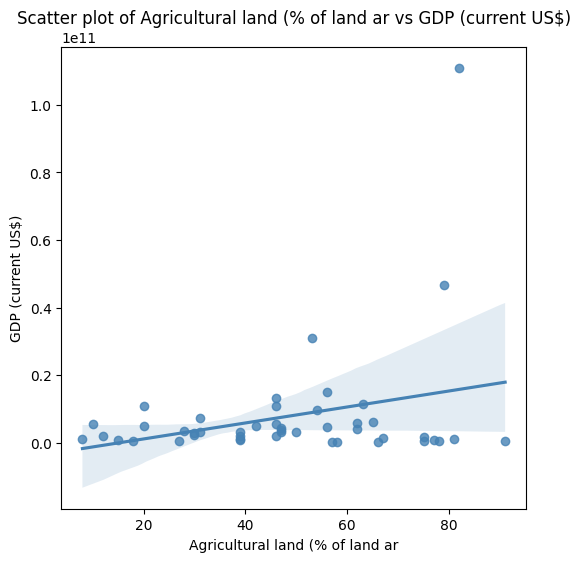

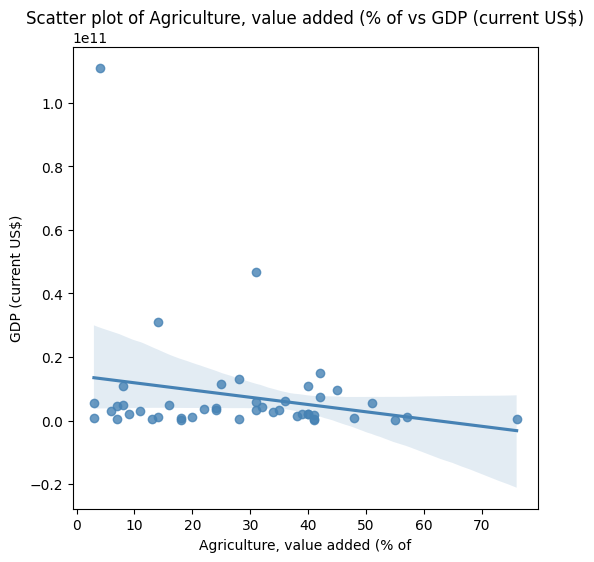

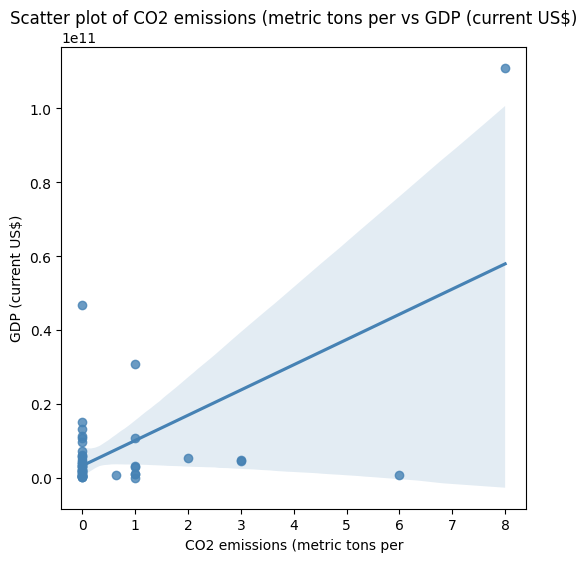

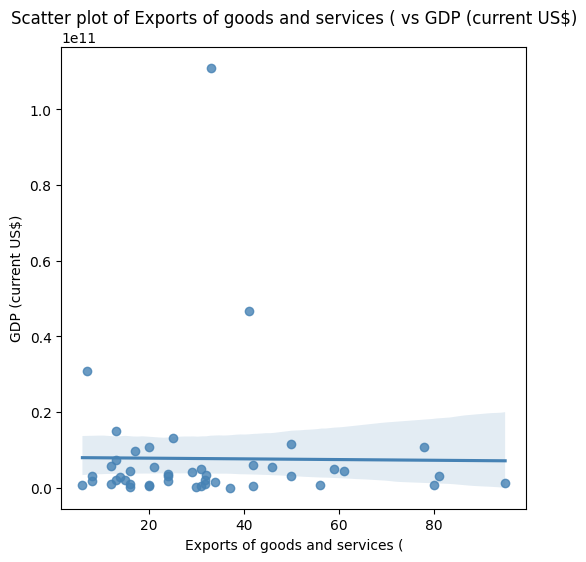

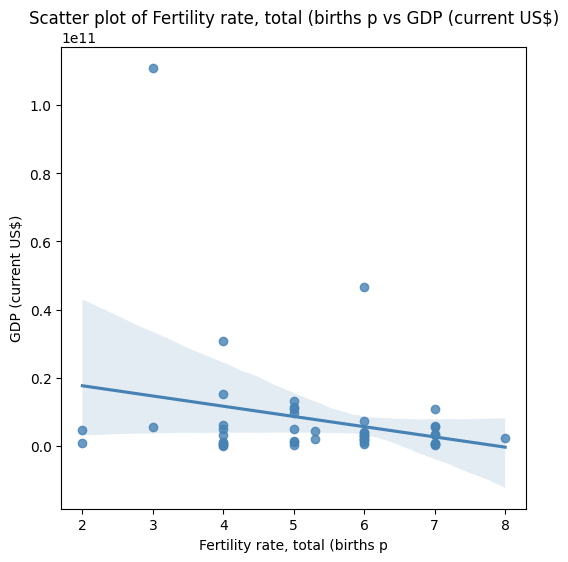

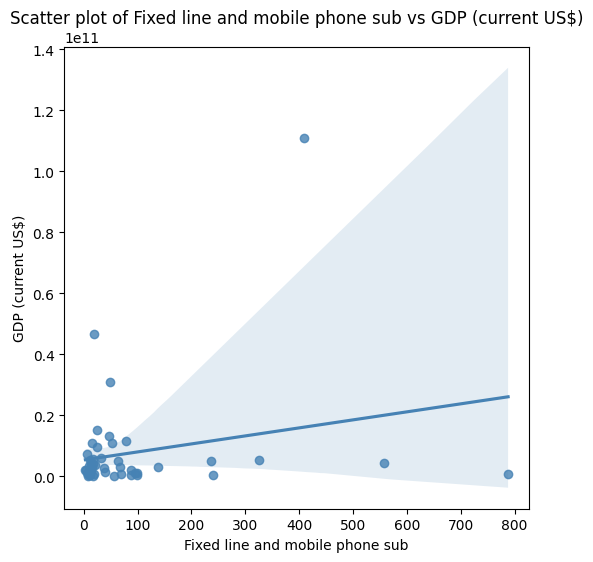

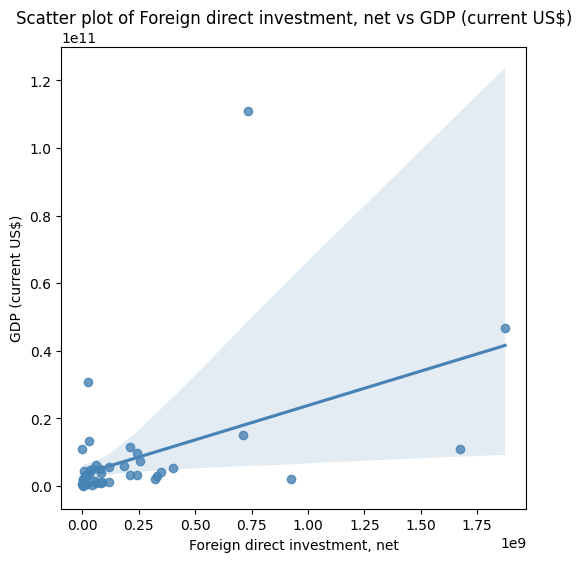

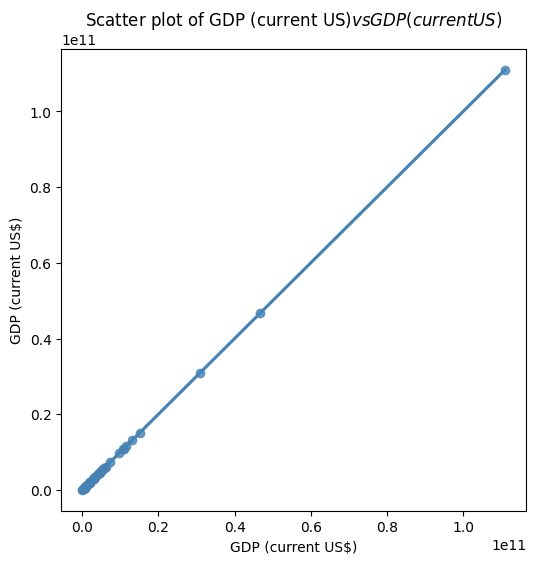

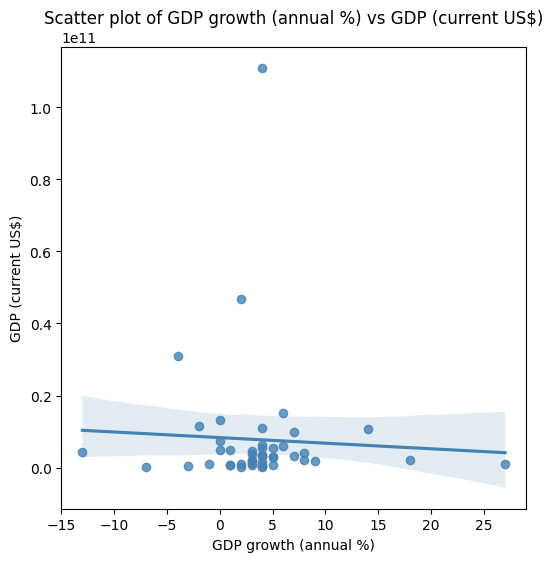

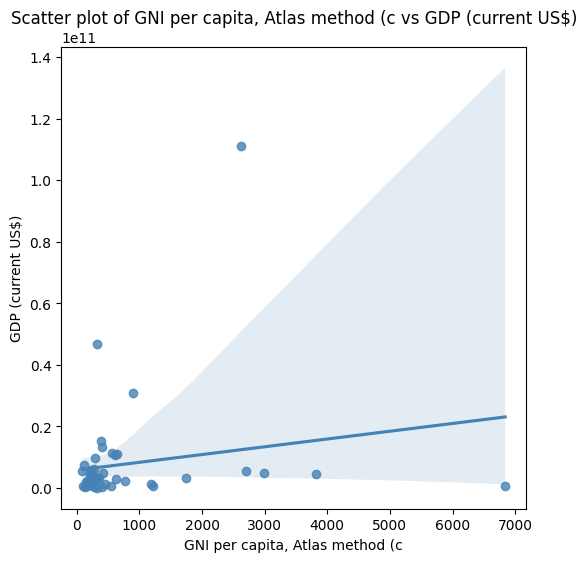

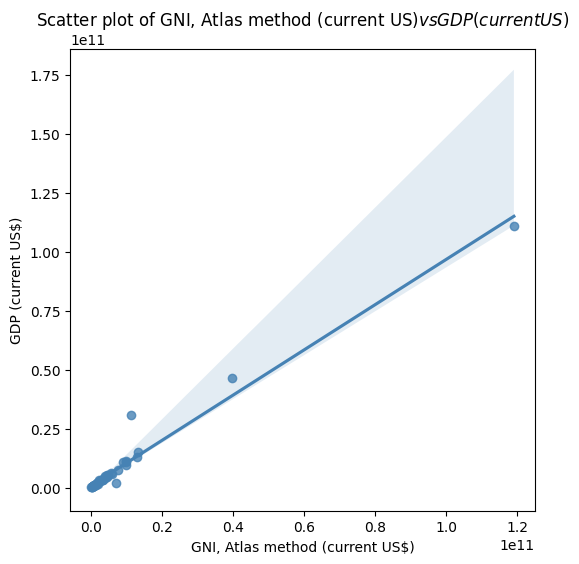

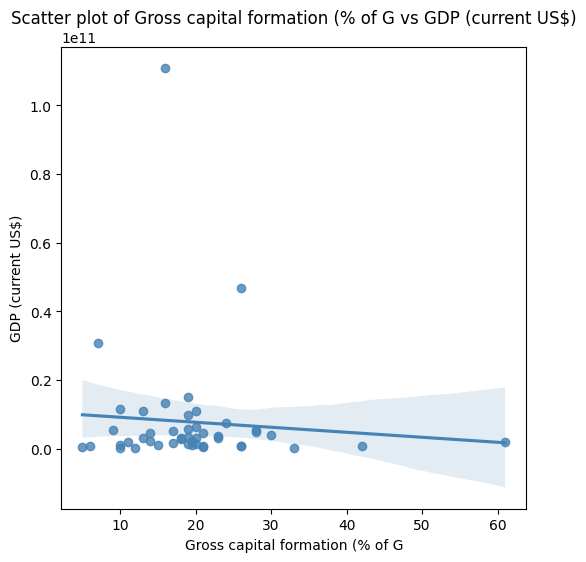

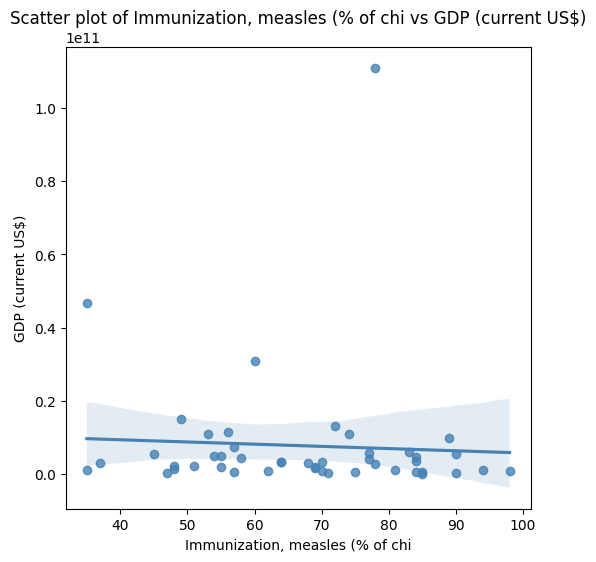

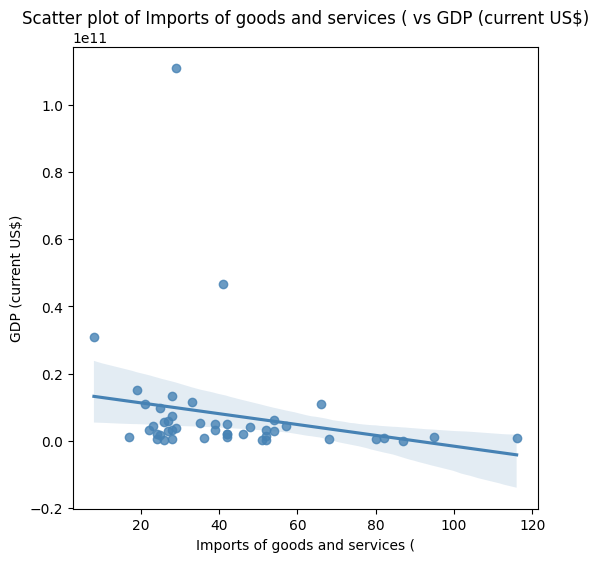

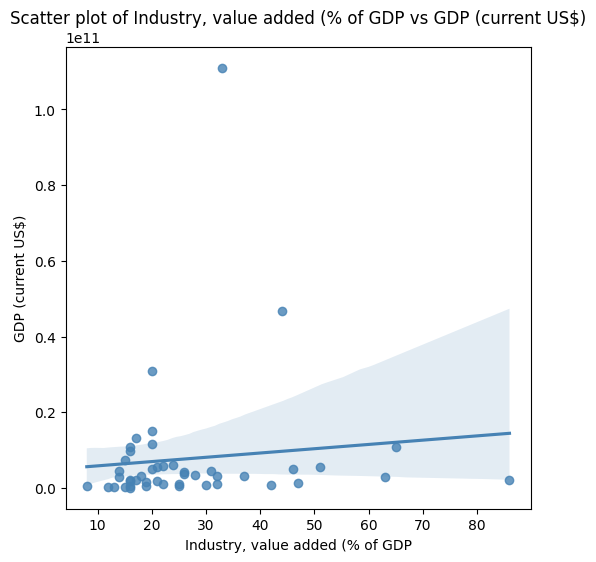

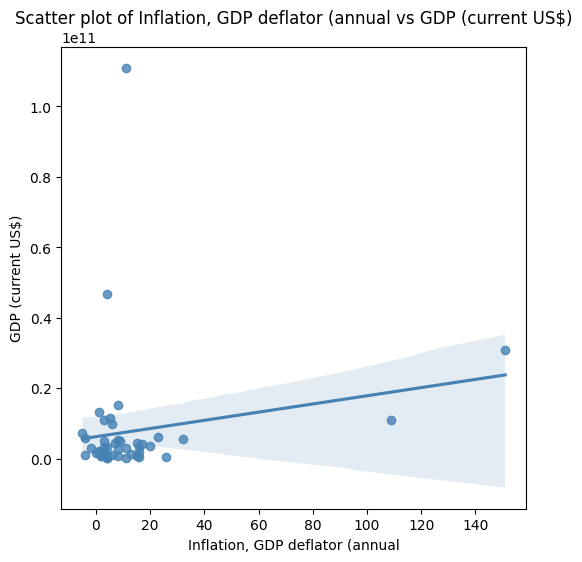

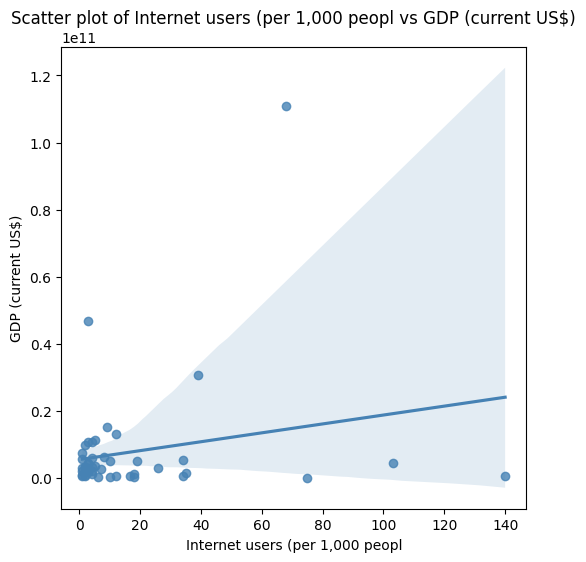

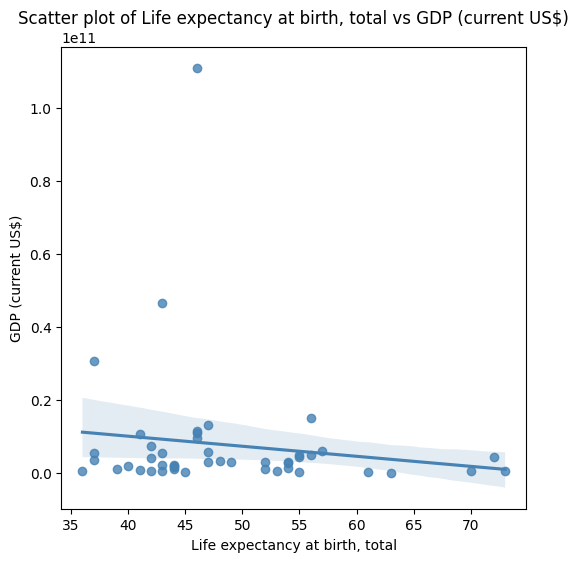

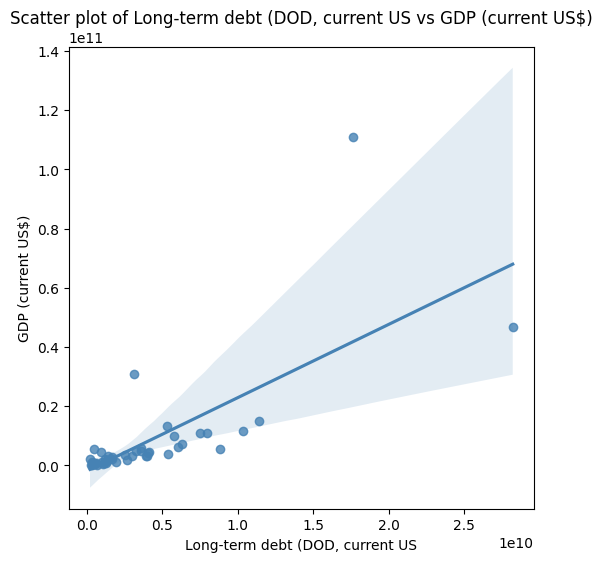

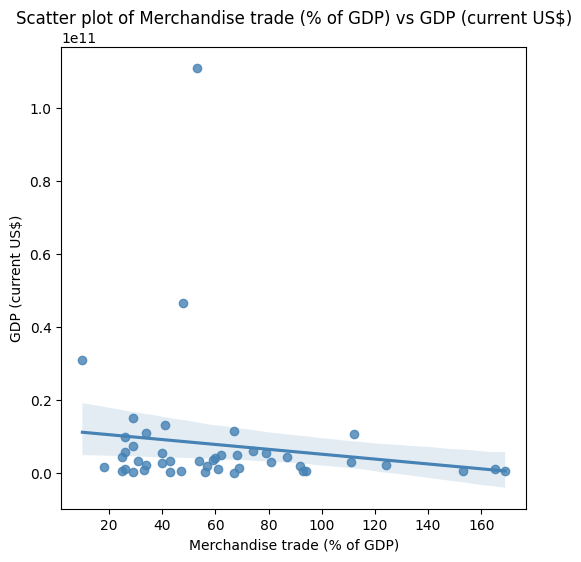

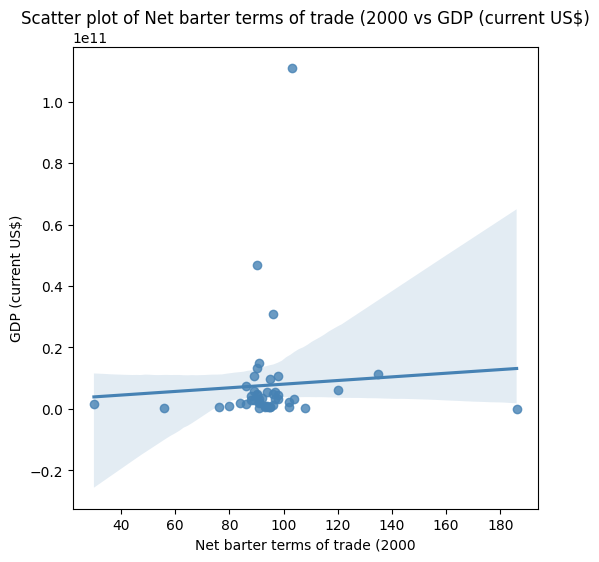

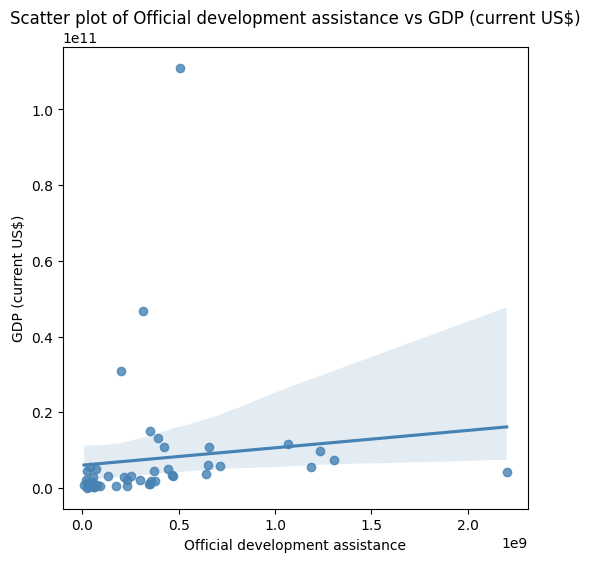

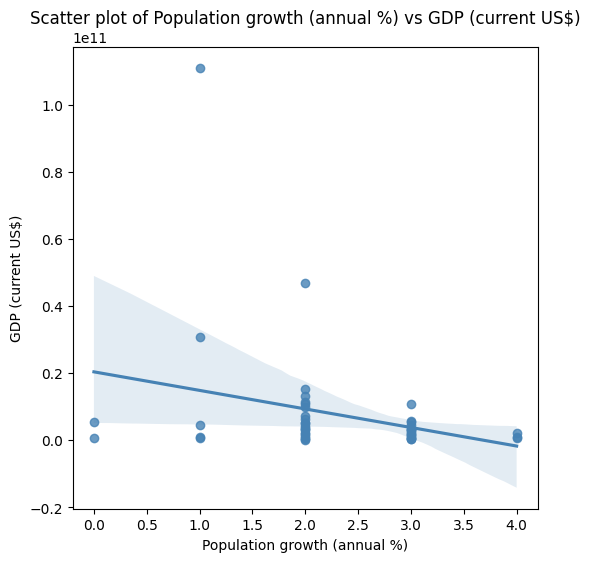

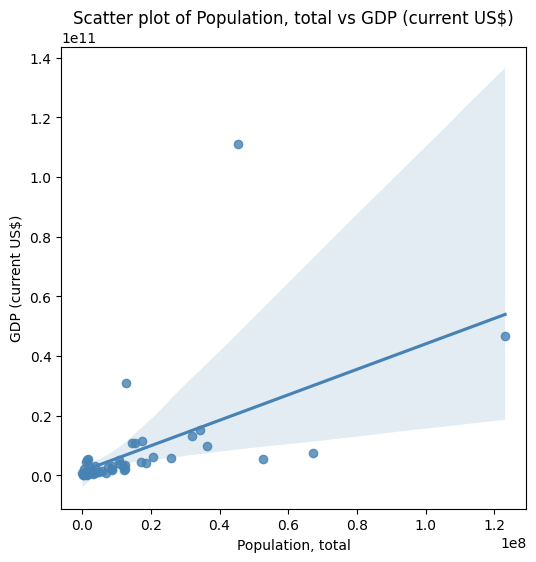

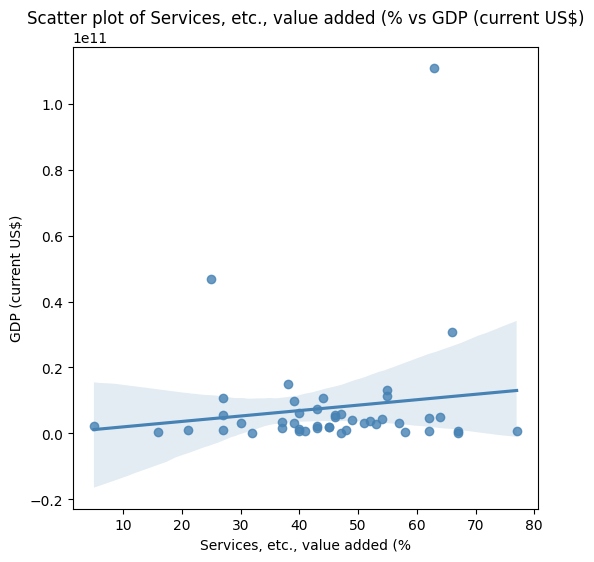

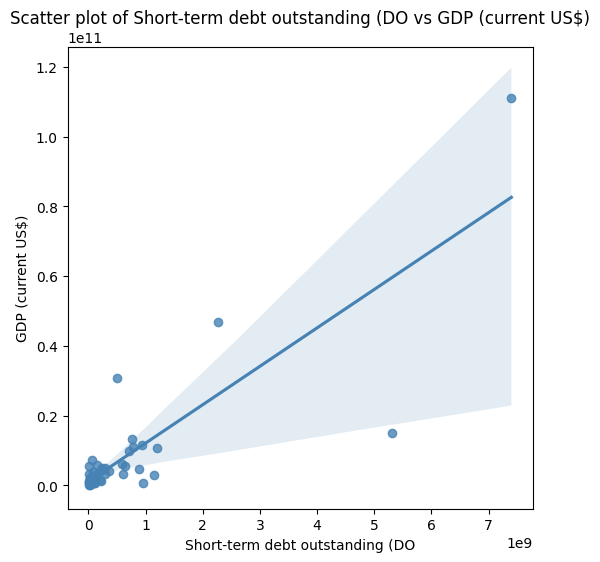

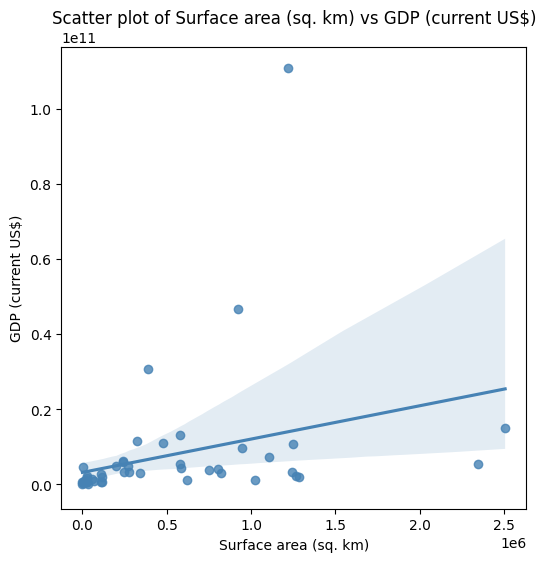

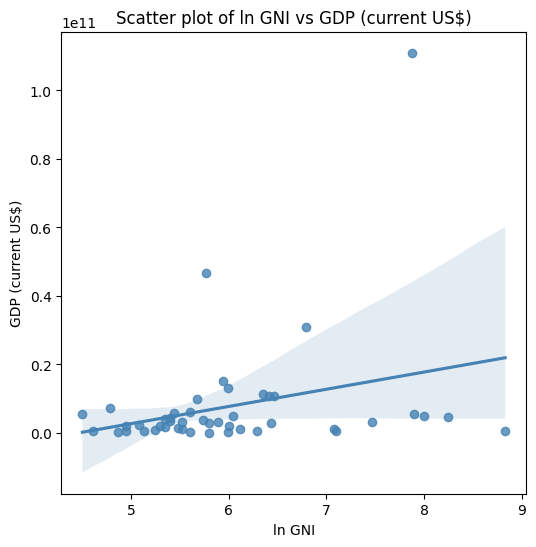

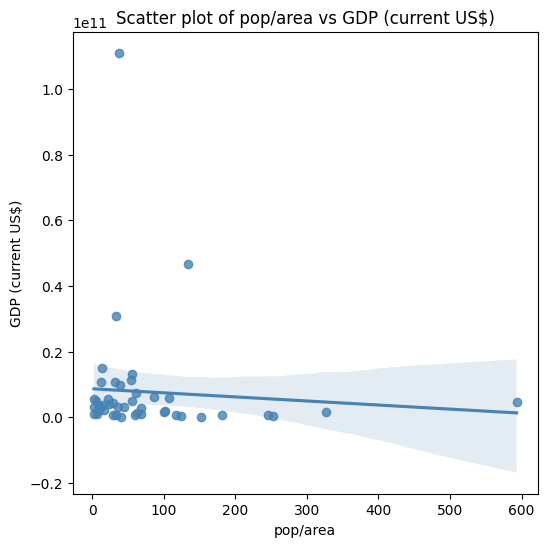

In [ ]:
target_variable = 'GDP (current US$)'

for col in num_col:
    plt.figure(figsize=(6, 6))
    sns.regplot(x=df[col], y=df[target_variable], color='steelblue')
    plt.title(f'Scatter plot of {col} vs {target_variable}')
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.show()

In [ ]:
df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

Terms for square:

'Agricultural land (% of land ar'

'Foreign direct investment, net'

'GDP growth (annual %)'

'GNI per capita, Atlas method (c'

 'Industry, value added (% of GDP'

 'Internet users (per 1,000 peopl'

'Long-term debt (DOD, current US'

'Net barter terms of trade (2000'

'Population, total'

'Surface area (sq. km)'

'ln GNI'

---
Terms for ln:

'Fixed line and mobile phone sub'



---
Terms for reciprocal:

'Agriculture, value added (% of'

'CO2 emissions (metric tons per'

'Fertility rate, total (births p'

'Imports of goods and services ('

'Life expectancy at birth, total'




In [ ]:
df

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
0,Angola,46.0,8.0,1.000000,78.000000,7.000000,15.000000,1.672000e+09,1.083480e+10,14.0,...,112.0,89.000000,4.213700e+08,3.0,14618782.0,27.0,1.208400e+09,1246700.0,6.413460,11.726
1,Benin,30.0,34.0,0.000000,14.000000,6.000000,37.000000,1.800000e+07,2.807360e+09,5.0,...,40.0,88.000000,2.162900e+08,3.0,7666962.0,53.0,7.360000e+07,112620.0,5.799090,68.078
2,Botswana,46.0,3.0,2.000000,46.000000,3.000000,326.000000,4.030000e+08,5.423320e+09,5.0,...,79.0,97.000000,3.756000e+07,0.0,1771008.0,46.0,1.600000e+07,581730.0,7.901010,3.044
3,Burkina Faso,39.0,31.0,0.000000,8.000000,7.000000,15.000000,1.502600e+07,3.203350e+09,4.0,...,31.0,91.000000,4.727300e+08,3.0,12022321.0,51.0,1.290000e+07,274000.0,5.521460,43.877
4,Burundi,91.0,41.0,0.000000,6.000000,7.000000,11.000000,1.000000e+03,6.280960e+08,4.0,...,25.0,76.000000,1.721200e+08,3.0,6818131.0,41.0,9.630000e+07,27830.0,4.605170,244.992
5,Cameroon,20.0,40.0,0.000000,20.000000,5.000000,53.000000,1.000000e+03,1.087980e+10,4.0,...,34.0,98.000000,6.570600e+08,2.0,15454616.0,44.0,7.788000e+08,475440.0,6.461470,32.506
6,Cape Verde,18.0,7.0,0.000000,31.000000,4.000000,240.000000,1.500000e+07,6.162090e+08,5.0,...,47.0,95.000000,9.219000e+07,2.0,472372.0,77.0,2.520000e+07,4030.0,7.098380,117.214
7,Central African Republic,8.0,57.0,0.000000,12.000000,5.000000,6.000000,5.644000e+06,1.045930e+09,-1.0,...,26.0,93.000000,5.980000e+07,1.0,3887379.0,21.0,5.170000e+07,622980.0,5.521460,6.240
8,Chad,39.0,40.0,0.000000,13.000000,5.295455,5.000000,9.240600e+08,1.982260e+09,8.0,...,92.0,84.000000,2.289900e+08,4.0,8814445.0,45.0,2.570000e+07,1284000.0,5.298320,6.865
9,Comoros,66.0,41.0,0.000000,16.000000,4.000000,18.000000,4.300000e+05,2.467380e+08,2.0,...,29.0,56.000000,3.246000e+07,2.0,563633.0,47.0,2.960000e+07,2230.0,5.991460,252.750


In [ ]:
target_variable = 'GDP (current US$)'
features = ['Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)',
       'Net barter terms of trade (2000', 'Official development assistance',
       'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area']

X = df[features]
y = df[target_variable]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

residuals = model.resid
ols_influence = OLSInfluence(model)
standardized_residuals = ols_influence.resid_studentized_internal

threshold = 3
outliers = abs(standardized_residuals) > threshold
df[outliers]

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area
0,Angola,46.0,8.0,1.0,78.0,7.0,15.0,1.672000e+09,1.083480e+10,14.0,...,112.0,89.0,421369984.0,3.0,14618782.0,27.0,1.208400e+09,1246700.0,6.41346,11.726
46,Zimbabwe,53.0,14.0,1.0,7.0,4.0,49.0,2.590000e+07,3.085260e+10,-4.0,...,10.0,96.0,200550000.0,1.0,12785585.0,66.0,5.020000e+08,390760.0,6.79122,32.720


In [ ]:
df = df.drop([0, 46])

In [ ]:
target_variable = 'GDP (current US$)'
features = ['Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)',
       'Net barter terms of trade (2000', 'Official development assistance',
       'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area']

X = df[features]
y = df[target_variable]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

residuals = model.resid
ols_influence = OLSInfluence(model)
standardized_residuals = ols_influence.resid_studentized_internal

threshold = 3
outliers = abs(standardized_residuals) > threshold
df[outliers]

,Series,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),...,Merchandise trade (% of GDP),Net barter terms of trade (2000,Official development assistance,Population growth (annual %),"Population, total","Services, etc., value added (%",Short-term debt outstanding (DO,Surface area (sq. km),ln GNI,pop/area


After continuously checking for outliers and dropping, we are left with 30 countries

Countries dropped:


*   Angola
*   Zimbabwe

Now that data is prepared we will conduct our regression analysis

## Regression Analysis

In [ ]:
# Perform linear regression
X = df.drop(columns=['Series','GDP (current US$)'])
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg1 = sm.OLS(y, X).fit()

print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1058.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.41e-20
Time:                        19:54:33   Log-Likelihood:                -933.11
No. Observations:                  44   AIC:                             1924.
Df Residuals:                      15   BIC:                             1976.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

P values for all except GNI, Atlas method (current US$) are far too high

In [ ]:
threshold = 0.1
correlated_columns = cormat[(cormat['GDP (current US$)'] > threshold) | (cormat['GDP (current US$)'] < -threshold)]
correlated_columns.index

Index(['Agricultural land (% of land ar', 'Agriculture, value added (% of',
       'CO2 emissions (metric tons per', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GNI per capita, Atlas method (c',
       'GNI, Atlas method (current US$)', 'Imports of goods and services (',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Official development assistance',
       'Population growth (annual %)', 'Population, total',
       'Services, etc., value added (%', 'Short-term debt outstanding (DO',
       'Surface area (sq. km)', 'ln GNI'],
      dtype='object')

In [ ]:
# Perform linear regression 2 (col w abs(corr)>.1)
col2 = ['Agricultural land (% of land ar',
        'Agriculture, value added (% of',
        'CO2 emissions (metric tons per',
        'Fertility rate, total (births p',
        'Fixed line and mobile phone sub',
        'Foreign direct investment, net',
        'GDP (current US$)',
        'GNI per capita, Atlas method (c',
        'GNI, Atlas method (current US$)',
        'Imports of goods and services (',
        'Inflation, GDP deflator (annual',
        'Internet users (per 1,000 peopl',
        'Life expectancy at birth, total',
        'Long-term debt (DOD, current US',
        'Merchandise trade (% of GDP)',
        'Official development assistance',
        'Population growth (annual %)',
        'Population, total',
        'Services, etc., value added (%',
        'Short-term debt outstanding (DO',
        'Surface area (sq. km)',
        'ln GNI']

X = df[col2]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg2 = sm.OLS(y, X).fit()

print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.424e+30
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          3.85e-316
Time:                        20:00:38   Log-Likelihood:                 447.73
No. Observations:                  44   AIC:                            -849.5
Df Residuals:                      21   BIC:                            -808.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Pvals still way too high, make threshold .2

In [ ]:
threshold = 0.2
correlated_columns = cormat[(cormat['GDP (current US$)'] > threshold) | (cormat['GDP (current US$)'] < -threshold)]
correlated_columns.index

Index(['Agricultural land (% of land ar', 'Agriculture, value added (% of',
       'CO2 emissions (metric tons per', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GNI, Atlas method (current US$)',
       'Internet users (per 1,000 peopl', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI'],
      dtype='object')

In [ ]:
# Perform linear regression 2 (col w abs(corr)>.1)
col3 = ['Agricultural land (% of land ar', 'Agriculture, value added (% of',
       'CO2 emissions (metric tons per', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GNI, Atlas method (current US$)',
       'Internet users (per 1,000 peopl', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI']

X = df[col3]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg3 = sm.OLS(y, X).fit()

print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1392.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           4.48e-37
Time:                        20:03:46   Log-Likelihood:                -956.81
No. Observations:                  44   AIC:                             1944.
Df Residuals:                      29   BIC:                             1970.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
threshold = 0.25
correlated_columns = cormat[(cormat['GDP (current US$)'] > threshold) | (cormat['GDP (current US$)'] < -threshold)]
correlated_columns.index

Index(['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net', 'GDP (current US$)',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI'],
      dtype='object')

In [ ]:
col4 = ['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI']

X = df[col4]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg4 = sm.OLS(y, X).fit()

print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1842.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.49e-42
Time:                        20:03:54   Log-Likelihood:                -960.89
No. Observations:                  44   AIC:                             1944.
Df Residuals:                      33   BIC:                             1963.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
#drop short term debt
col5 = ['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Population growth (annual %)', 'Population, total',
       'Surface area (sq. km)',
        'ln GNI']

X = df[col5]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg5 = sm.OLS(y, X).fit()

print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2108.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.23e-44
Time:                        20:04:30   Log-Likelihood:                -960.90
No. Observations:                  44   AIC:                             1942.
Df Residuals:                      34   BIC:                             1960.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
#drop pooulation total
col6 =['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Population growth (annual %)',
       'Surface area (sq. km)',
        'ln GNI']


X = df[col6]
y = df['GDP (current US$)']
X = sm.add_constant(X)
reg6 = sm.OLS(y, X).fit()

print(reg6.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2441.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.02e-45
Time:                        20:06:05   Log-Likelihood:                -960.90
No. Observations:                  44   AIC:                             1940.
Df Residuals:                      35   BIC:                             1956.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
#drop population growth
col7 = ['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Surface area (sq. km)',
        'ln GNI']

X = df[col7]
y = df['GDP (current US$)']
X = sm.add_constant(X)

reg7 = sm.OLS(y, X).fit()

print(reg7.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2866.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.87e-47
Time:                        20:06:14   Log-Likelihood:                -960.92
No. Observations:                  44   AIC:                             1938.
Df Residuals:                      36   BIC:                             1952.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
#drop ln GNI
col8 = ['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US',
       'Surface area (sq. km)']

X = df[col8]
y = df['GDP (current US$)']
X = sm.add_constant(X)

reg8 = sm.OLS(y, X).fit()

print(reg8.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3432.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.11e-49
Time:                        20:07:08   Log-Likelihood:                -960.95
No. Observations:                  44   AIC:                             1936.
Df Residuals:                      37   BIC:                             1948.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
#drop surface area
col9 = ['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US']

X = df[col9]
y = df['GDP (current US$)']
X = sm.add_constant(X)

reg9 = sm.OLS(y, X).fit()

print(reg9.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4155.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           6.35e-51
Time:                        20:07:53   Log-Likelihood:                -961.35
No. Observations:                  44   AIC:                             1935.
Df Residuals:                      38   BIC:                             1945.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
#drop foreign invest
col10 = ['Agricultural land (% of land ar', 'CO2 emissions (metric tons per',
       'GNI, Atlas method (current US$)', 'Long-term debt (DOD, current US']

X = df[col10]
y = df['GDP (current US$)']
X = sm.add_constant(X)

reg10 = sm.OLS(y, X).fit()

print(reg10.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5187.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.38e-52
Time:                        20:08:33   Log-Likelihood:                -961.94
No. Observations:                  44   AIC:                             1934.
Df Residuals:                      39   BIC:                             1943.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

reg 10 is the best model yet

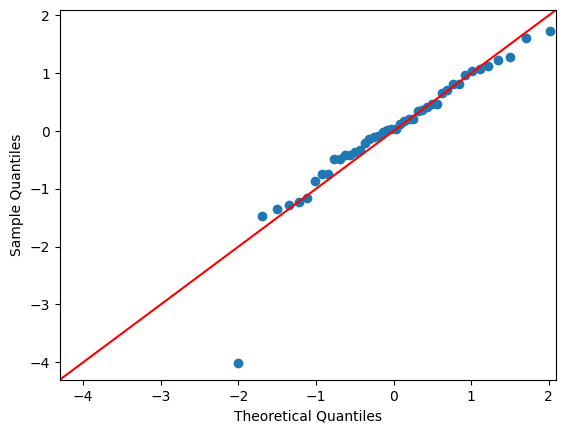

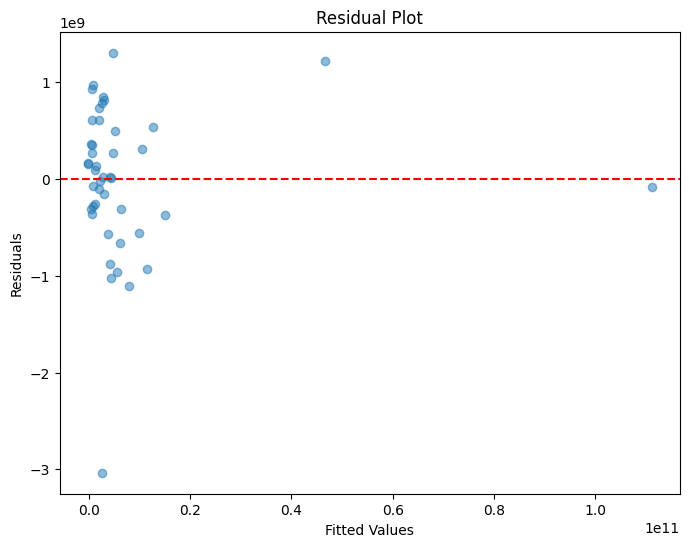

In [ ]:
residuals = reg10.resid

fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Pretty good, still some curviture

Next we will try regressions with variable transformations to see if that would help

In [ ]:
#Add ln col
df['ln_GDP'] = np.log(df['GDP (current US$)'])

In [ ]:
cormat = df.corr()
cormat = cormat.round(2)

<ipython-input-226-0db0800f3f9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = df.corr()


In [ ]:
# Perform ln linear regression
X = df.drop(columns=['Series','GDP (current US$)', 'ln_GDP'])
y =df['ln_GDP']
X = sm.add_constant(X)
lnreg1 = sm.OLS(y, X).fit()

print(lnreg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_GDP   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     5.736
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           0.000447
Time:                        20:09:23   Log-Likelihood:                -23.167
No. Observations:                  44   AIC:                             104.3
Df Residuals:                      15   BIC:                             156.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
threshold = 0.1
correlated_columns = cormat[(cormat['ln_GDP'] > threshold) | (cormat['ln_GDP'] < -threshold)]
correlated_columns.index

Index(['Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net', 'GDP (current US$)',
       'GNI, Atlas method (current US$)', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Internet users (per 1,000 peopl', 'Life expectancy at birth, total',
       'Long-term debt (DOD, current US', 'Merchandise trade (% of GDP)',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Short-term debt outstanding (DO',
       'Surface area (sq. km)', 'ln GNI', 'pop/area', 'ln_GDP'],
      dtype='object')

In [ ]:
lncol1 = ['Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Internet users (per 1,000 peopl', 'Life expectancy at birth, total',
       'Long-term debt (DOD, current US', 'Merchandise trade (% of GDP)',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Short-term debt outstanding (DO',
       'Surface area (sq. km)', 'ln GNI', 'pop/area']

X = df[lncol1]
y = df['GDP (current US$)']
X = sm.add_constant(X)
lnreg1 = sm.OLS(y, X).fit()

print(lnreg1.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1650.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.80e-34
Time:                        20:10:30   Log-Likelihood:                -944.29
No. Observations:                  44   AIC:                             1927.
Df Residuals:                      25   BIC:                             1960.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
threshold = 0.2
correlated_columns = cormat[(cormat['ln_GDP'] > threshold) | (cormat['ln_GDP'] < -threshold)]
correlated_columns.index

Index(['CO2 emissions (metric tons per', 'Foreign direct investment, net',
       'GDP (current US$)', 'GNI, Atlas method (current US$)',
       'Immunization, measles (% of chi', 'Imports of goods and services (',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Official development assistance',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln_GDP'],
      dtype='object')

In [ ]:
lncol2 = ['CO2 emissions (metric tons per', 'Foreign direct investment, net',
        'GNI, Atlas method (current US$)',
       'Immunization, measles (% of chi', 'Imports of goods and services (',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Official development assistance',
       'Population growth (annual %)', 'Population, total',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)']

X = df[lncol2]
y = df['GDP (current US$)']
lnreg2 = sm.OLS(y, X).fit()

print(lnreg2.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              1871.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    4.53e-41
Time:                        20:10:21   Log-Likelihood:                         -956.82
No. Observations:                  44   AIC:                                      1940.
Df Residuals:                      31   BIC:                                      1963.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
#drop shortterm debt
lncol3 = ['CO2 emissions (metric tons per', 'Foreign direct investment, net',
        'GNI, Atlas method (current US$)',
       'Immunization, measles (% of chi', 'Imports of goods and services (',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Official development assistance',
       'Population growth (annual %)', 'Population, total',
       'Surface area (sq. km)']

X = df[lncol3]
y = df['GDP (current US$)']
lnreg3 = sm.OLS(y, X).fit()

print(lnreg3.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2092.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    9.66e-43
Time:                        20:11:27   Log-Likelihood:                         -956.82
No. Observations:                  44   AIC:                                      1938.
Df Residuals:                      32   BIC:                                      1959.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
threshold = 0.3
correlated_columns = cormat[(cormat['ln_GDP'] > threshold) | (cormat['ln_GDP'] < -threshold)]
correlated_columns.index

Index(['Foreign direct investment, net', 'GDP (current US$)',
       'GNI, Atlas method (current US$)', 'Imports of goods and services (',
       'Long-term debt (DOD, current US', 'Official development assistance',
       'Population, total', 'Short-term debt outstanding (DO',
       'Surface area (sq. km)', 'ln_GDP'],
      dtype='object')

In [ ]:
lncol4 = ['Foreign direct investment, net', 'GDP (current US$)',
       'GNI, Atlas method (current US$)', 'Imports of goods and services (',
       'Long-term debt (DOD, current US', 'Official development assistance',
       'Population, total', 'Short-term debt outstanding (DO',
       'Surface area (sq. km)', 'ln_GDP']

X = df[lncol4]
y = df['GDP (current US$)']
lnreg4 = sm.OLS(y, X).fit()

print(lnreg4.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.535e+30
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                        0.00
Time:                        20:12:06   Log-Likelihood:                          398.73
No. Observations:                  44   AIC:                                     -777.5
Df Residuals:                      34   BIC:                                     -759.6
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
#drop surface area
lncol4 = ['Agricultural land (% of land ar', 'Foreign direct investment, net',
       'GNI, Atlas method (current US$)',
       'Life expectancy at birth, total',
       'Long-term debt (DOD, current US', 'Official development assistance',
       'Population, total', 'Short-term debt outstanding (DO']

X = df[lncol4]
y = df['GDP (current US$)']
lnreg4 = sm.OLS(y, X).fit()

print(lnreg4.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2839.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    5.12e-48
Time:                        20:12:32   Log-Likelihood:                         -961.60
No. Observations:                  44   AIC:                                      1939.
Df Residuals:                      36   BIC:                                      1953.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
#drop population
lncol4 = ['Agricultural land (% of land ar', 'Foreign direct investment, net',
       'GNI, Atlas method (current US$)',
       'Life expectancy at birth, total',
       'Long-term debt (DOD, current US', 'Official development assistance',
       'Short-term debt outstanding (DO']

X = df[lncol4]
y = df['GDP (current US$)']
lnreg4 = sm.OLS(y, X).fit()

print(lnreg4.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              3335.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    8.50e-50
Time:                        20:13:06   Log-Likelihood:                         -961.60
No. Observations:                  44   AIC:                                      1937.
Df Residuals:                      37   BIC:                                      1950.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
#drop short term debt
lncol4 = ['Agricultural land (% of land ar',
       'Foreign direct investment, net',
       'GNI, Atlas method (current US$)',
       'Life expectancy at birth, total',
       'Long-term debt (DOD, current US',
       'Official development assistance',]

X = df[lncol4]
y = df['GDP (current US$)']
lnreg4 = sm.OLS(y, X).fit()

print(lnreg4.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              3975.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    1.42e-51
Time:                        20:15:46   Log-Likelihood:                         -961.72
No. Observations:                  44   AIC:                                      1935.
Df Residuals:                      38   BIC:                                      1946.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
#drop foreign invest
lncol5 = ['Agricultural land (% of land ar',
       'GNI, Atlas method (current US$)',
       'Life expectancy at birth, total',
       'Long-term debt (DOD, current US',
       'Official development assistance',]

X = df[lncol5]
y = df['GDP (current US$)']
lnreg5 = sm.OLS(y, X).fit()

print(lnreg5.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              4876.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    2.07e-53
Time:                        20:16:11   Log-Likelihood:                         -961.81
No. Observations:                  44   AIC:                                      1934.
Df Residuals:                      39   BIC:                                      1943.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [ ]:
#drop life expectancy
lncol6 = ['Agricultural land (% of land ar',
       'GNI, Atlas method (current US$)',
       'Long-term debt (DOD, current US',
       'Official development assistance',]

X = df[lncol6]
y = df['GDP (current US$)']
lnreg6 = sm.OLS(y, X).fit()

print(lnreg6.summary())

                                 OLS Regression Results                                
Dep. Variable:      GDP (current US$)   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              5768.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):                    1.22e-54
Time:                        20:20:16   Log-Likelihood:                         -963.57
No. Observations:                  44   AIC:                                      1935.
Df Residuals:                      40   BIC:                                      1942.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

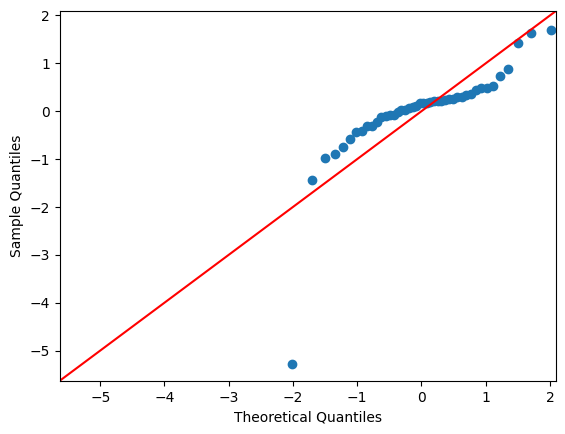

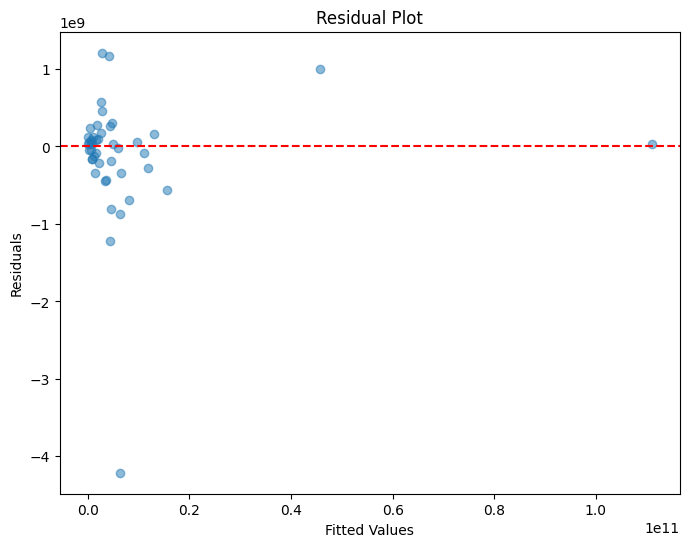

In [ ]:
residuals = lnreg6.resid

fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(lnreg6.fittedvalues, residuals, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

We still are having to limit the variables the same as the above regular linear regression, residual plot not great; lets try adding square and interaction terms

In [ ]:
print(cormat)

                                 Agricultural land (% of land ar  \
Agricultural land (% of land ar                             1.00   
Agriculture, value added (% of                             -0.09   
CO2 emissions (metric tons per                              0.03   
Exports of goods and services (                             0.07   
Fertility rate, total (births p                            -0.12   
Fixed line and mobile phone sub                            -0.13   
Foreign direct investment, net                              0.20   
GDP (current US$)                                           0.29   
GDP growth (annual %)                                      -0.12   
GNI per capita, Atlas method (c                            -0.17   
GNI, Atlas method (current US$)                             0.27   
Gross capital formation (% of G                             0.04   
Immunization, measles (% of chi                             0.33   
Imports of goods and services (                 

In [ ]:
df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

Potential Interactions:

'Agriculture, value added (% of' and 'CO2 emissions (metric tons per'

'Agriculture, value added (% of' and 'Exports of goods and services ('

'Agriculture, value added (% of' and 'Fixed line and mobile phone sub'

'Agriculture, value added (% of' and  'GNI per capita, Atlas method (c'

'CO2 emissions (metric tons per' and 'GNI per capita, Atlas method (c'

'CO2 emissions (metric tons per' and 'Fixed line and mobile phone sub'

'Exports of goods and services (' and 'Fixed line and mobile phone sub'

'Fixed line and mobile phone sub' and 'Fertility rate, total (births p'

------------

Non-linear w GDP:

'CO2 emissions (metric tons per'

'Exports of goods and services ('


In [ ]:
#create interactions based on correlations
df['Agriculture_CO2_interaction'] = df['Agriculture, value added (% of'] * df['CO2 emissions (metric tons per']
df['Agriculture_Exports_interaction'] = df['Agriculture, value added (% of'] * df['Exports of goods and services (']
df['CO2_GNI_interaction'] = df['CO2 emissions (metric tons per'] * df['GNI per capita, Atlas method (c']
df['GDP_growth_Internet_interaction'] = df['GDP growth (annual %)'] * df['Internet users (per 1,000 peopl']
df['Population_Surface_interaction'] = df['Population, total'] * df['Surface area (sq. km)']

#based on real world context
df['Agriculture_GDP_Growth_Interaction'] = df['Agriculture, value added (% of'] * df['GDP growth (annual %)']
df['CO2_Emissions_GDP_Growth_Interaction'] = df['CO2 emissions (metric tons per'] * df['GDP growth (annual %)']
df['Internet_Usage_Services_Interaction'] = df['Internet users (per 1,000 peopl'] * df['Services, etc., value added (%']
df['Population_Growth_Services_Interaction'] = df['Population growth (annual %)'] * df['Services, etc., value added (%']
df['Capital_Formation_Industrial_Interaction'] = df['Gross capital formation (% of G'] * df['Industry, value added (% of GDP']
df['GNI_ODA_Interaction'] = df['GNI per capita, Atlas method (c'] * df['Official development assistance']
df['Long_Short_Debt_Interaction'] = df['Long-term debt (DOD, current US'] * df['Short-term debt outstanding (DO']
df['CO2_Emissions_Agriculture_Interaction'] = df['CO2 emissions (metric tons per'] * df['Agriculture, value added (% of']
df['Fertility_Population_Growth_Interaction'] = df['Fertility rate, total (births p'] * df['Population growth (annual %)']

df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

In [ ]:
#regress
colA = ['Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area', 'Agriculture_CO2_interaction',
       'Agriculture_Exports_interaction', 'CO2_GNI_interaction',
       'GDP_growth_Internet_interaction', 'Population_Surface_interaction',
       'Agriculture_GDP_Growth_Interaction',
       'CO2_Emissions_GDP_Growth_Interaction',
       'Internet_Usage_Services_Interaction',
       'Population_Growth_Services_Interaction',
       'Capital_Formation_Industrial_Interaction', 'GNI_ODA_Interaction',
       'Long_Short_Debt_Interaction', 'CO2_Emissions_Agriculture_Interaction',
       'Fertility_Population_Growth_Interaction']

X = df[colA]
y = df['GDP (current US$)']
X = sm.add_constant(X)
regA = sm.OLS(y, X).fit()

print(regA.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2419.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.07e-45
Time:                        20:21:41   Log-Likelihood:                -957.87
No. Observations:                  44   AIC:                             1936.
Df Residuals:                      34   BIC:                             1954.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## Adding Squares

In [ ]:
#create square terms
# List of columns for which you want to create square terms
columns_to_square = [
    'Agricultural land (% of land ar',
    'Foreign direct investment, net',
    'GDP growth (annual %)',
    'GNI per capita, Atlas method (c',
    'Industry, value added (% of GDP',
    'Internet users (per 1,000 peopl',
    'Long-term debt (DOD, current US',
    'Net barter terms of trade (2000',
    'Population, total',
    'Surface area (sq. km)',
    'ln GNI'
]

for col in columns_to_square:
    square_col = df[col] ** 2
    df[f'{col}_squared'] = square_col

df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

In [ ]:
#regress
colB = ['Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln GNI',
       'pop/area', 'Agriculture_CO2_interaction',
       'Agriculture_Exports_interaction', 'CO2_GNI_interaction',
       'GDP_growth_Internet_interaction', 'Population_Surface_interaction',
       'Agriculture_GDP_Growth_Interaction',
       'CO2_Emissions_GDP_Growth_Interaction',
       'Internet_Usage_Services_Interaction',
       'Population_Growth_Services_Interaction',
       'Capital_Formation_Industrial_Interaction', 'GNI_ODA_Interaction',
       'Long_Short_Debt_Interaction', 'CO2_Emissions_Agriculture_Interaction',
       'Fertility_Population_Growth_Interaction', 'Agricultural land (% of land ar_squared',
       'Foreign direct investment, net_squared',
       'GDP growth (annual %)_squared',
       'GNI per capita, Atlas method (c_squared',
       'Industry, value added (% of GDP_squared',
       'Internet users (per 1,000 peopl_squared',
       'Long-term debt (DOD, current US_squared',
       'Net barter terms of trade (2000_squared', 'Population, total_squared',
       'Surface area (sq. km)_squared', 'ln GNI_squared']

X = df[colB]
y = df['GDP (current US$)']
X = sm.add_constant(X)
regB = sm.OLS(y, X).fit()

print(regB.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1942.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           3.83e-40
Time:                        20:22:27   Log-Likelihood:                -951.87
No. Observations:                  44   AIC:                             1932.
Df Residuals:                      30   BIC:                             1957.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
p_values = regB.pvalues

# Find the variables with p-values above 0.5
variables_to_drop = p_values[p_values > 0.5].index
variables_to_drop


Index(['Fertility rate, total (births p', 'Fixed line and mobile phone sub',
       'GNI per capita, Atlas method (c', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Short-term debt outstanding (DO', 'ln GNI', 'CO2_GNI_interaction',
       'Population_Surface_interaction', 'Internet_Usage_Services_Interaction',
       'GNI per capita, Atlas method (c_squared',
       'Long-term debt (DOD, current US_squared',
       'Surface area (sq. km)_squared', 'ln GNI_squared'],
      dtype='object')

In [ ]:
#regress
colC = ['Agricultural land (% of land ar',
        'Agriculture, value added (% of',
        'CO2 emissions (metric tons per',
        'Exports of goods and services (',
        'Foreign direct investment, net',
        'GDP growth (annual %)',
        'GNI, Atlas method (current US$)',
        'Gross capital formation (% of G',
        'Immunization, measles (% of chi',
        'Imports of goods and services (',
        'Industry, value added (% of GDP',
        'Inflation, GDP deflator (annual',
        'Merchandise trade (% of GDP)',
        'Net barter terms of trade (2000',
        'Official development assistance',
        'Population growth (annual %)',
        'Population, total',
        'Services, etc., value added (%',
        'Surface area (sq. km)',
        'pop/area',
        'Agriculture_CO2_interaction',
        'Agriculture_Exports_interaction',
        'GDP_growth_Internet_interaction',
        'Agriculture_GDP_Growth_Interaction',
        'CO2_Emissions_GDP_Growth_Interaction',
        'Population_Growth_Services_Interaction',
        'Capital_Formation_Industrial_Interaction',
        'GNI_ODA_Interaction',
        'Long_Short_Debt_Interaction',
        'CO2_Emissions_Agriculture_Interaction',
        'Fertility_Population_Growth_Interaction',
        'Agricultural land (% of land ar_squared',
        'Foreign direct investment, net_squared',
        'GDP growth (annual %)_squared',
        'Industry, value added (% of GDP_squared',
        'Internet users (per 1,000 peopl_squared',
        'Net barter terms of trade (2000_squared',
        'Population, total_squared']

X = df[colC]
y = df['GDP (current US$)']
X = sm.add_constant(X)
regC = sm.OLS(y, X).fit()

print(regC.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3616.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.07e-48
Time:                        20:27:02   Log-Likelihood:                -952.27
No. Observations:                  44   AIC:                             1923.
Df Residuals:                      35   BIC:                             1939.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
p_values = regC.pvalues

# Find the variables with p-values above 0.5
variables_to_drop = p_values[p_values > 0.5].index
variables_to_drop


Index(['const', 'Agricultural land (% of land ar',
       'CO2 emissions (metric tons per', 'Exports of goods and services (',
       'GDP growth (annual %)', 'Gross capital formation (% of G',
       'Immunization, measles (% of chi', 'Imports of goods and services (',
       'Industry, value added (% of GDP', 'Inflation, GDP deflator (annual',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Population growth (annual %)', 'Surface area (sq. km)', 'pop/area',
       'Agriculture_CO2_interaction', 'GDP_growth_Internet_interaction',
       'Agriculture_GDP_Growth_Interaction',
       'CO2_Emissions_GDP_Growth_Interaction',
       'Capital_Formation_Industrial_Interaction',
       'CO2_Emissions_Agriculture_Interaction',
       'Fertility_Population_Growth_Interaction',
       'Agricultural land (% of land ar_squared',
       'GDP growth (annual %)_squared',
       'Industry, value added (% of GDP_squared',
       'Internet users (per 1,000 peopl_squared'

In [ ]:
#regress
colC = ['Agriculture, value added (% of',
        'Foreign direct investment, net',
        'GNI, Atlas method (current US$)',
        'Official development assistance',
        'Population, total',
        'Services, etc., value added (%',
        'Agriculture_Exports_interaction',
        'Population_Growth_Services_Interaction',
        'GNI_ODA_Interaction',
        'Long_Short_Debt_Interaction',
        'Foreign direct investment, net_squared',
        'Net barter terms of trade (2000_squared',
        'Population, total_squared']

X = df[colC]
y = df['GDP (current US$)']
X = sm.add_constant(X)
regC = sm.OLS(y, X).fit()

print(regC.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4214.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.83e-50
Time:                        20:29:42   Log-Likelihood:                -952.46
No. Observations:                  44   AIC:                             1921.
Df Residuals:                      36   BIC:                             1935.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
#drop pop sq
#regress
colD = ['Agriculture, value added (% of',
        'Foreign direct investment, net',
        'GNI, Atlas method (current US$)',
        'Official development assistance',
        'Population, total',
        'Services, etc., value added (%',
        'Agriculture_Exports_interaction',
        'Population_Growth_Services_Interaction',
        'GNI_ODA_Interaction',
        'Long_Short_Debt_Interaction',
        'Foreign direct investment, net_squared',
        'Net barter terms of trade (2000_squared']

X = df[colD]
y = df['GDP (current US$)']
X = sm.add_constant(X)
regD = sm.OLS(y, X).fit()

print(regD.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4697.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           9.48e-52
Time:                        20:31:04   Log-Likelihood:                -954.06
No. Observations:                  44   AIC:                             1922.
Df Residuals:                      37   BIC:                             1935.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

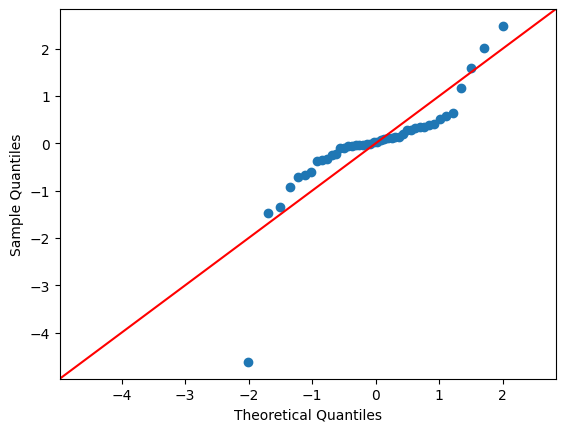

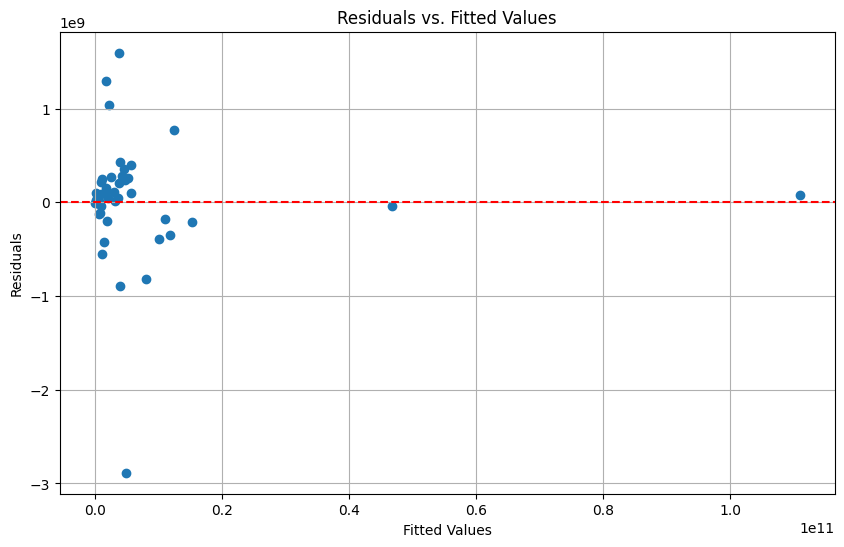

In [ ]:
residuals = regD.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(regD.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:
correlation_matrix = X.corr()
correlation_matrix

,const,"Agriculture, value added (% of","Foreign direct investment, net","GNI, Atlas method (current US$)",Official development assistance,"Population, total","Services, etc., value added (%",Agriculture_Exports_interaction,Population_Growth_Services_Interaction,GNI_ODA_Interaction,Long_Short_Debt_Interaction,"Foreign direct investment, net_squared",Net barter terms of trade (2000_squared
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Agriculture, value added (% of",NaN,1.000000,-0.090164,-0.211462,0.188046,0.181180,-0.536391,0.507922,-0.133564,-0.241850,-0.135521,0.003383,-0.194625
"Foreign direct investment, net",NaN,-0.090164,1.000000,0.506633,0.107634,0.724703,-0.199323,0.030971,-0.202468,0.249413,0.632928,0.920712,-0.067869
"GNI, Atlas method (current US$)",NaN,-0.211462,0.506633,1.000000,0.117270,0.488648,0.110460,-0.150956,-0.203499,0.826522,0.933073,0.397510,0.031361
Official development assistance,NaN,0.188046,0.107634,0.117270,1.000000,0.436390,0.006803,0.069806,-0.003523,0.449172,0.064033,-0.005830,-0.000413
"Population, total",NaN,0.181180,0.724703,0.488648,0.436390,1.000000,-0.185598,0.153235,-0.183935,0.285731,0.553577,0.759622,-0.067359
"Services, etc., value added (%",NaN,-0.536391,-0.199323,0.110460,0.006803,-0.185598,1.000000,-0.379990,0.606825,0.276677,0.044111,-0.204288,0.284031
Agriculture_Exports_interaction,NaN,0.507922,0.030971,-0.150956,0.069806,0.153235,-0.379990,1.000000,-0.241375,-0.153313,-0.092196,0.144658,0.094493
Population_Growth_Services_Interaction,NaN,-0.133564,-0.202468,-0.203499,-0.003523,-0.183935,0.606825,-0.241375,1.000000,-0.111283,-0.209716,-0.154640,0.023103
GNI_ODA_Interaction,NaN,-0.241850,0.249413,0.826522,0.449172,0.285731,0.276677,-0.153313,-0.111283,1.000000,0.708254,0.078655,0.115983


In [ ]:
# Assuming df is your DataFrame
df['ODA_squared'] = df['Official development assistance'] ** 2


#drop pop sq
#regress
colE = ['Agriculture, value added (% of',
        'Foreign direct investment, net',
        'GNI, Atlas method (current US$)',
        'Population, total',
        'Services, etc., value added (%',
        'Agriculture_Exports_interaction',
        'Population_Growth_Services_Interaction',
        'GNI_ODA_Interaction',
        'Long_Short_Debt_Interaction',
        'Foreign direct investment, net_squared',
        'Net barter terms of trade (2000_squared']

X = df[colE]
y = df['GDP (current US$)']
X = sm.add_constant(X)
regE = sm.OLS(y, X).fit()

print(regE.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4908.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.69e-52
Time:                        20:43:37   Log-Likelihood:                -957.69
No. Observations:                  44   AIC:                             1927.
Df Residuals:                      38   BIC:                             1938.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

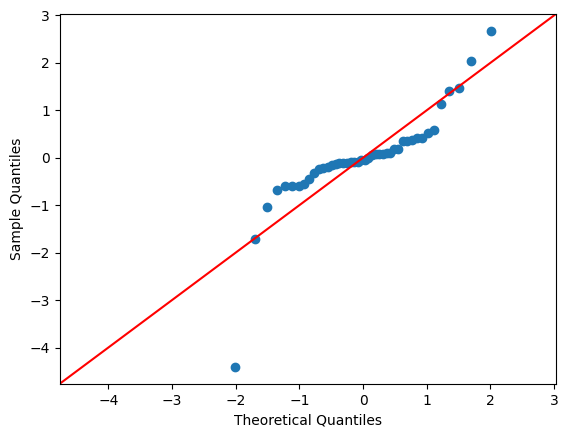

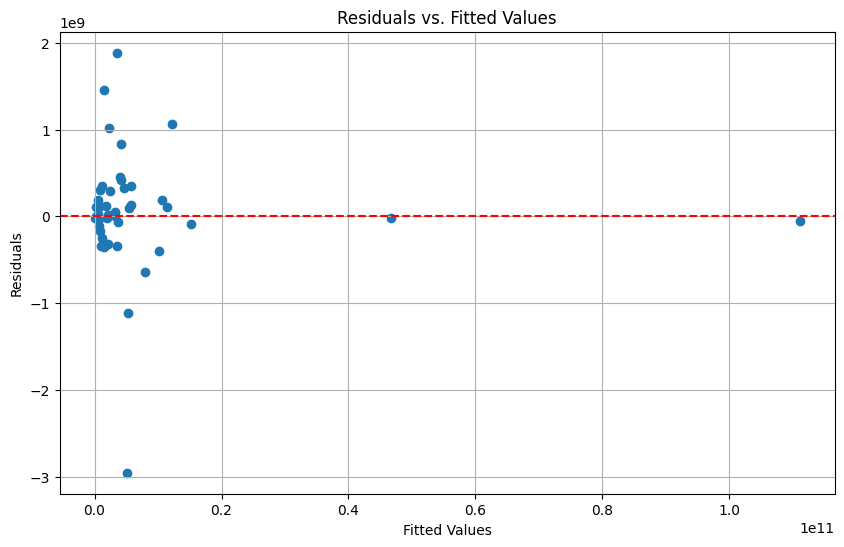

In [ ]:
residuals = regE.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(regE.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

Best yet p val wise, resid and Q-Q plot still meh


In [ ]:
df.columns

Index(['Series', 'Agricultural land (% of land ar',
       'Agriculture, value added (% of', 'CO2 emissions (metric tons per',
       'Exports of goods and services (', 'Fertility rate, total (births p',
       'Fixed line and mobile phone sub', 'Foreign direct investment, net',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (c', 'GNI, Atlas method (current US$)',
       'Gross capital formation (% of G', 'Immunization, measles (% of chi',
       'Imports of goods and services (', 'Industry, value added (% of GDP',
       'Inflation, GDP deflator (annual', 'Internet users (per 1,000 peopl',
       'Life expectancy at birth, total', 'Long-term debt (DOD, current US',
       'Merchandise trade (% of GDP)', 'Net barter terms of trade (2000',
       'Official development assistance', 'Population growth (annual %)',
       'Population, total', 'Services, etc., value added (%',
       'Short-term debt outstanding (DO', 'Surface area (sq. km)', 'ln G

In [ ]:
df['Agricultural_Land_Agriculture_Interaction'] = df['Agricultural land (% of land ar'] * df['Agriculture, value added (% of']

df['Exports_Imports_Interaction'] = df['Exports of goods and services ('] * df['Imports of goods and services (']

df['Immunization_Life_Expectancy_Interaction'] = df['Immunization, measles (% of chi'] * df['Life expectancy at birth, total']

df['Fertility_Population_Interaction'] = df['Fertility rate, total (births p'] * df['Population, total']


In [ ]:
cx_col1 = ['Agricultural land (% of land ar',
          'Fertility rate, total (births p',
          'Immunization, measles (% of chi',
          'Inflation, GDP deflator (annual',
          'pop/area',
          'Short-term debt outstanding (DO',
          'Agricultural_Land_Agriculture_Interaction',
          'Exports_Imports_Interaction',
          'Fertility_Population_Interaction',
          'Immunization_Life_Expectancy_Interaction',
          'Fertility_Population_Growth_Interaction',
          'Life expectancy at birth, total_squared',
          'Internet users (per 1,000 peopl_squared',
          'Long-term debt (DOD, current US_squared',
          'Surface area (sq. km)_squared',
          'FDI_Population_Interaction']

X = df[cx_col1]
y = df['GDP (current US$)']
X = sm.add_constant(X)
cx_reg1 = sm.OLS(y, X).fit()

print(cx_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     92.81
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.20e-19
Time:                        21:40:53   Log-Likelihood:                -1048.3
No. Observations:                  44   AIC:                             2107.
Df Residuals:                      39   BIC:                             2116.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

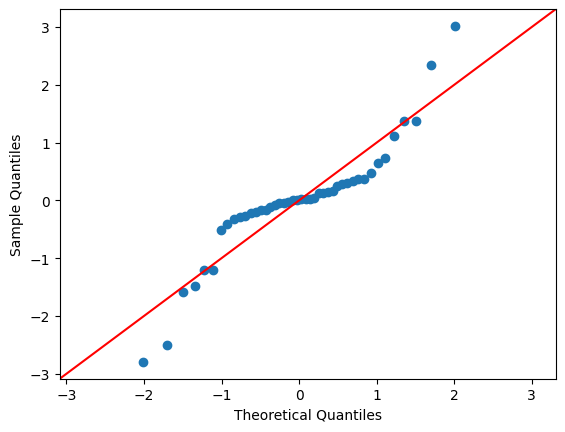

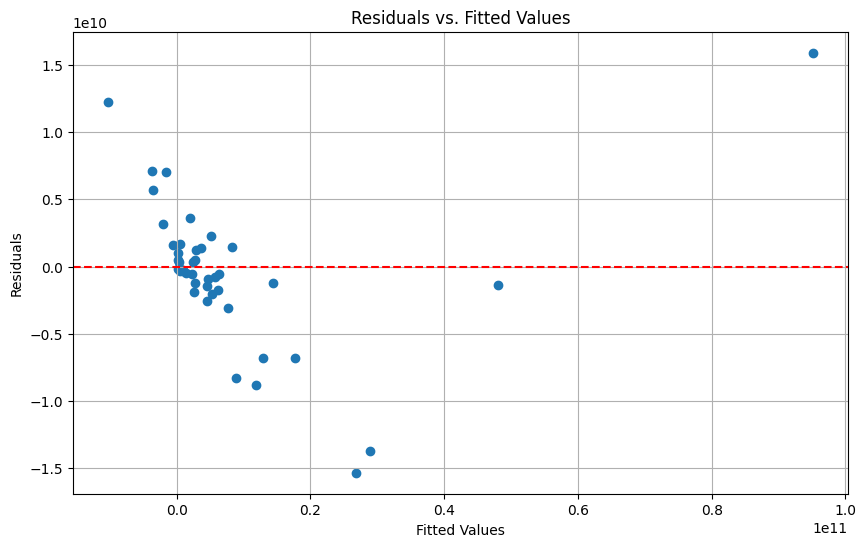

In [ ]:
residuals = cx_reg1.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(cx_reg1.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:
X_design = X.values

# Calculate VIF for each variable
vif = [variance_inflation_factor(X_design, i) for i in range(X_design.shape[1])]
vif_df = pd.DataFrame({'Variable': X.columns, 'VIF': vif})
vif_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
0,const,0.000000
1,Agricultural land (% of land ar,0.287226
2,"Fertility rate, total (births p",0.124948
3,"Immunization, measles (% of chi",0.094176
4,"Inflation, GDP deflator (annual",0.784175
5,pop/area,0.769838
6,Short-term debt outstanding (DO,4.830223
7,Agricultural_Land_Agriculture_Interaction,0.500222
8,Exports_Imports_Interaction,0.605316
9,Fertility_Population_Interaction,3.386656


In [ ]:
cx_col1 = ['Fertility rate, total (births p',
          'Immunization, measles (% of chi',
          'Inflation, GDP deflator (annual',
          'pop/area',
          'Short-term debt outstanding (DO',
          'Agricultural_Land_Agriculture_Interaction',
          'Exports_Imports_Interaction',
          'Immunization_Life_Expectancy_Interaction',
          'Life expectancy at birth, total_squared',
          'Internet users (per 1,000 peopl_squared']

X = df[cx_col1]
y = df['GDP (current US$)']
X = sm.add_constant(X)
cx_reg1 = sm.OLS(y, X).fit()

print(cx_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     14.12
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           2.95e-09
Time:                        21:43:25   Log-Likelihood:                -1063.5
No. Observations:                  44   AIC:                             2149.
Df Residuals:                      33   BIC:                             2169.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [ ]:
corr_matrix = df.corr()
corr_matrix

<ipython-input-307-208d05607fc1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Agricultural land (% of land ar,"Agriculture, value added (% of",CO2 emissions (metric tons per,Exports of goods and services (,"Fertility rate, total (births p",Fixed line and mobile phone sub,"Foreign direct investment, net",GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (c",...,Net barter terms of trade (2000_squared,"Population, total_squared",Surface area (sq. km)_squared,ln GNI_squared,FDI_Population_Interaction,ODA_squared,Agricultural_Land_Agriculture_Interaction,Exports_Imports_Interaction,Immunization_Life_Expectancy_Interaction,Fertility_Population_Interaction
Agricultural land (% of land ar,1.000000,-0.088188,0.029482,0.069099,-0.121166,-0.130408,0.204150,0.286861,-0.122667,-0.173892,...,0.066859,0.172407,-0.165197,-0.093661,0.246029,0.024831,0.605454,0.166845,0.133859,0.081037
"Agriculture, value added (% of",-0.088188,1.000000,-0.539773,-0.630566,0.575804,-0.574827,-0.090164,-0.194365,-0.005508,-0.587055,...,-0.194625,0.084993,0.236419,-0.735704,0.018342,0.094315,0.628796,-0.529691,-0.477530,0.224416
CO2 emissions (metric tons per,0.029482,-0.539773,1.000000,0.467471,-0.617331,0.837287,0.132244,0.611944,-0.053683,0.820939,...,0.088301,-0.020565,-0.021206,0.779469,0.019696,-0.126172,-0.443189,0.369505,0.397135,-0.124680
Exports of goods and services (,0.069099,-0.630566,0.467471,1.000000,-0.557786,0.561250,0.059798,0.014474,-0.113263,0.597521,...,0.183186,-0.016277,-0.223984,0.682871,0.039260,-0.126895,-0.414031,0.899915,0.314879,-0.188004
"Fertility rate, total (births p",-0.121166,0.575804,-0.617331,-0.557786,1.000000,-0.719095,-0.061606,-0.228615,0.142705,-0.711815,...,-0.198926,0.097382,0.079257,-0.818700,0.043733,0.156847,0.354636,-0.511999,-0.579174,0.253146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ODA_squared,0.024831,0.094315,-0.126172,-0.126895,0.156847,-0.160955,0.083889,0.026407,0.077207,-0.159565,...,-0.012639,0.099406,0.182546,-0.211264,0.006055,1.000000,0.047739,-0.148819,-0.097491,0.287822
Agricultural_Land_Agriculture_Interaction,0.605454,0.628796,-0.443189,-0.414031,0.354636,-0.492386,0.057883,-0.093046,-0.049056,-0.502722,...,-0.175400,0.160481,-0.018022,-0.592006,0.177861,0.047739,1.000000,-0.291529,-0.180500,0.178163
Exports_Imports_Interaction,0.166845,-0.529691,0.369505,0.899915,-0.511999,0.465785,-0.045139,-0.102855,-0.076772,0.497897,...,0.199735,-0.082198,-0.237397,0.540742,-0.034143,-0.148819,-0.291529,1.000000,0.378025,-0.240652
Immunization_Life_Expectancy_Interaction,0.133859,-0.477530,0.397135,0.314879,-0.579174,0.612831,-0.298395,-0.090546,-0.087930,0.553286,...,0.273274,-0.280977,-0.261004,0.513527,-0.248044,-0.097491,-0.180500,0.378025,1.000000,-0.356550


In [ ]:
cx_col = ['pop/area',
          'Fertility rate, total (births p',
          'Immunization, measles (% of chi',
          'Short-term debt outstanding (DO',
          'Agricultural_Land_Agriculture_Interaction',
          'Exports_Imports_Interaction',
          'Immunization_Life_Expectancy_Interaction',
          'Life expectancy at birth, total_squared',
          'Internet users (per 1,000 peopl_squared',
          'Long-term debt (DOD, current US_squared']


X = df[cx_col]
y = df['GDP (current US$)']
X = sm.add_constant(X)
cx_reg = sm.OLS(y, X).fit()

print(cx_reg.summary())

                            OLS Regression Results                            
Dep. Variable:      GDP (current US$)   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     159.2
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           7.02e-16
Time:                        21:39:29   Log-Likelihood:                -1065.6
No. Observations:                  44   AIC:                             2135.
Df Residuals:                      42   BIC:                             2139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

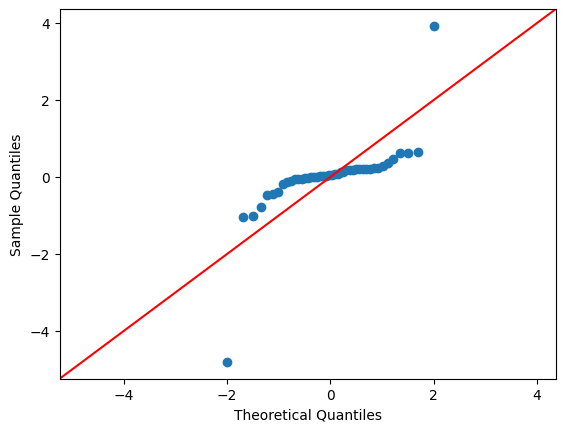

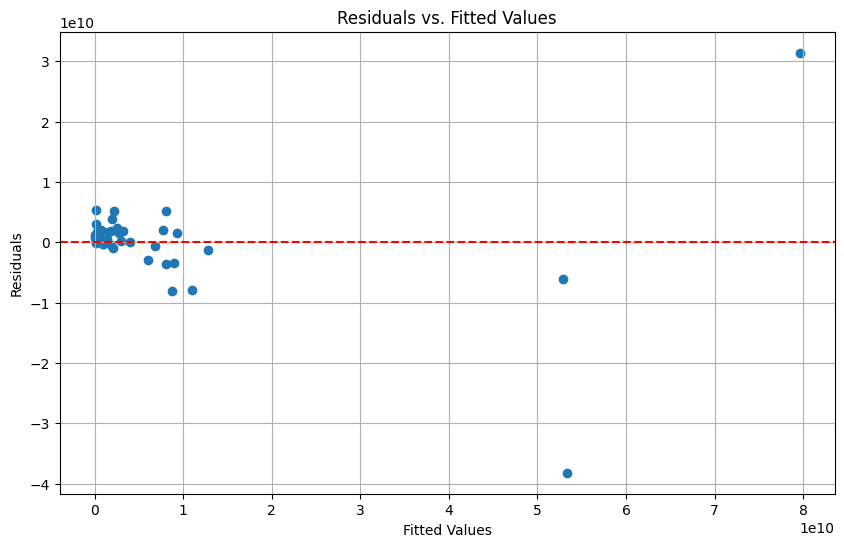

In [ ]:
residuals = cx_reg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(cx_reg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:
X_design = X.values

# Calculate VIF for each variable
vif = [variance_inflation_factor(X_design, i) for i in range(X_design.shape[1])]
vif_df = pd.DataFrame({'Variable': X.columns, 'VIF': vif})
vif_df

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
0,const,0.000000
1,pop/area,0.673077
2,"Fertility rate, total (births p",0.073114
3,"Immunization, measles (% of chi",0.065912
4,Short-term debt outstanding (DO,1.298405
5,Agricultural_Land_Agriculture_Interaction,0.357229
6,Exports_Imports_Interaction,0.587250
7,Immunization_Life_Expectancy_Interaction,0.133586
8,"Life expectancy at birth, total_squared",0.147682
9,"Internet users (per 1,000 peopl_squared",0.954871


In [ ]:
selected_col = ['pop/area',
          'Fertility rate, total (births p',
          'Immunization, measles (% of chi',
          'Short-term debt outstanding (DO',
          'Agricultural_Land_Agriculture_Interaction',
          'Exports_Imports_Interaction',
          'Immunization_Life_Expectancy_Interaction',
          'Life expectancy at birth, total_squared',
          'Internet users (per 1,000 peopl_squared',
          'Long-term debt (DOD, current US_squared']

selected_df = df[selected_col]
correlation_matrix = selected_df.corr()
correlation_matrix

,pop/area,"Fertility rate, total (births p","Immunization, measles (% of chi",Short-term debt outstanding (DO,Agricultural_Land_Agriculture_Interaction,Exports_Imports_Interaction,Immunization_Life_Expectancy_Interaction,"Life expectancy at birth, total_squared","Internet users (per 1,000 peopl_squared","Long-term debt (DOD, current US_squared"
pop/area,1.000000,-0.332614,0.293790,-0.069987,0.233529,0.142041,0.482479,0.509529,0.479577,0.004565
"Fertility rate, total (births p",-0.332614,1.000000,-0.431780,-0.281405,0.354636,-0.511999,-0.579174,-0.557926,-0.595655,-0.024583
"Immunization, measles (% of chi",0.293790,-0.431780,1.000000,-0.124545,-0.076709,0.340043,0.834319,0.345101,0.393452,-0.297121
Short-term debt outstanding (DO,-0.069987,-0.281405,-0.124545,1.000000,-0.030106,-0.104672,-0.088728,0.005007,0.099091,0.541665
Agricultural_Land_Agriculture_Interaction,0.233529,0.354636,-0.076709,-0.030106,1.000000,-0.291529,-0.180500,-0.228434,-0.325448,0.122834
Exports_Imports_Interaction,0.142041,-0.511999,0.340043,-0.104672,-0.291529,1.000000,0.378025,0.282668,0.459802,-0.060466
Immunization_Life_Expectancy_Interaction,0.482479,-0.579174,0.834319,-0.088728,-0.180500,0.378025,1.000000,0.798183,0.650332,-0.252870
"Life expectancy at birth, total_squared",0.509529,-0.557926,0.345101,0.005007,-0.228434,0.282668,0.798183,1.000000,0.653215,-0.134905
"Internet users (per 1,000 peopl_squared",0.479577,-0.595655,0.393452,0.099091,-0.325448,0.459802,0.650332,0.653215,1.000000,-0.021695
"Long-term debt (DOD, current US_squared",0.004565,-0.024583,-0.297121,0.541665,0.122834,-0.060466,-0.252870,-0.134905,-0.021695,1.000000
